# Starters
## Import Packages

In [19]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [20]:
import scipy.stats as st
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [21]:
sns.set_style('darkgrid')

## Helpers methods
### Data description methods

In [22]:
# Function to quickly describe data
def data_desc(my_imported_data):
    print(my_imported_data.dropna(how = 'all').shape) #pour voir si certaines lignes comportent des valeurs NaN partout (Non)
    print(my_imported_data.shape)
    return(my_imported_data.dtypes)

# Function to return in a dictionary ratio of nan values per variable sorted in descending order
def display_nan_Values(my_imported_data):
    nan_dict = {my_imported_data.columns[var]: my_imported_data.iloc[:,var].isna().mean()
                     for var in range(my_imported_data.shape[1])}
    sorted_dict_by_nanvalues = sorted(nan_dict.items(), key=lambda x:x[1], reverse=True)
    sorted_dict = dict(sorted_dict_by_nanvalues)
    return sorted_dict

### Data visualization methods

In [23]:
def boxPlotAll(df):
    '''Show box plots for each feature'''
    
    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])

    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.plot(kind='box', subplots=True, figsize=(layout_cols*unit_size+1,layout_rows*unit_size+1), layout=(layout_rows,layout_cols))

    plt.show()   

### Filter methods

In [24]:
def is_family(item):
    return "multifamily" in item or "Multifamily" in item

### Methods to use in PCA

In [25]:
# Plot correlation graph
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
#    --------------------------------------------------------------------------
# Function to display factorial planes
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

## Import Data

In [26]:
first_dataset = pd.read_csv('/Users/souha_kassab/OC_project3/static/csv/first_clean_dataset_3_3.csv', 
                            index_col=[0])
#imported_data.iloc[:, data_cols]
data_desc(first_dataset)
# -------------------------------------------------------------------------------

(3347, 37)
(3347, 37)


Osebuildingid                        int64
Datayear                             int64
Buildingtype                        object
Primarypropertytype                 object
Propertyname                        object
Address                             object
City                                object
State                               object
Zipcode                            float64
Councildistrictcode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
Yearbuilt                            int64
Numberofbuildings                  float64
Numberoffloors                       int64
Propertygfatotal                     int64
Propertygfaparking                   int64
Propertygfabuilding(S)               int64
Listofallpropertyusetypes           object
Largestpropertyusetype              object
Largestpropertyusetypegfa          float64
Secondlargestpropertyusetype        object
Secondlarge

In [27]:
first_dataset.describe()

Osebuildingid  Datayear      Zipcode  Councildistrictcode     Latitude  \
count    3347.000000    3347.0   3331.00000          3347.000000  3347.000000   
mean    21213.109352    2016.0  98116.97118             4.437108    47.623868   
std     12221.630959       0.0     18.67340             2.122061     0.047691   
min         1.000000    2016.0  98006.00000             1.000000    47.499170   
25%     19996.000000    2016.0  98105.00000             3.000000    47.599825   
50%     23111.000000    2016.0  98115.00000             4.000000    47.618610   
75%     25995.500000    2016.0  98122.00000             7.000000    47.656950   
max     50226.000000    2016.0  98272.00000             7.000000    47.733870   

         Longitude    Yearbuilt  Numberofbuildings  Numberoffloors  \
count  3347.000000  3347.000000        3347.000000     3347.000000   
mean   -122.334790  1968.543472           1.107260        4.711383   
std       0.027194    33.108357           2.114935        5.509412   
min    -122.414250  1900.000000           0.000000        0.000000   
25%    -122.350610  1948.000000           1.000000        2.000000   
50%    -122.332490  1974.000000           1.000000        4.000000   
75%    -122.319495  1997.000000           1.000000        5.000000   
max    -122.220966  2015.000000         111.000000       99.000000   

       Propertygfatotal  ...  Siteeui(Kbtu/Sf)  Siteeuiwn(Kbtu/Sf)  \
count      3.347000e+03  ...       3347.000000         3347.000000   
mean       9.478208e+04  ...         54.908515           57.245384   
std        2.185555e+05  ...         56.391580           57.272409   
min        1.128500e+04  ...          0.000000            0.000000   
25%        2.846000e+04  ...         28.000000           29.400000   
50%        4.420200e+04  ...         38.700001           40.900002   
75%        9.112900e+04  ...         60.500000           64.450001   
max        9.320156e+06  ...        834.400024          834.400024   

       Sourceeui(Kbtu/Sf)  Sourceeuiwn(Kbtu/Sf)  Siteenergyuse(Kbtu)  \
count         3347.000000           3347.000000         3.347000e+03   
mean           134.624261            138.218315         5.429845e+06   
std            139.520948            139.311983         2.168443e+07   
min              0.000000              0.000000         0.000000e+00   
25%             74.699997             78.500000         9.316154e+05   
50%             96.300003            101.300003         1.809587e+06   
75%            144.000000            148.650002         4.229376e+06   
max           2620.000000           2620.000000         8.739237e+08   

       Siteenergyusewn(Kbtu)  Steamuse(Kbtu)  Electricity(Kbtu)  \
count           3.347000e+03    3.347000e+03       3.347000e+03   
mean            5.301368e+06    2.762367e+05       3.721567e+06   
std             1.598878e+07    3.923790e+06       1.489323e+07   
min             0.000000e+00    0.000000e+00       0.000000e+00   
25%             9.810644e+05    0.000000e+00       6.423830e+05   
50%             1.916414e+06    0.000000e+00       1.180845e+06   
75%             4.399047e+06    0.000000e+00       2.831799e+06   
max             4.716139e+08    1.349435e+08       6.570744e+08   

       Naturalgas(Kbtu)  Totalghgemissions  
count      3.347000e+03        3347.000000  
mean       1.373074e+06         120.190618  
std        6.728444e+06         540.357947  
min        0.000000e+00           0.000000  
25%        0.000000e+00           9.630000  
50%        3.256170e+05          34.080000  
75%        1.191238e+06          94.120000  
max        2.979090e+08       16870.980000  

[8 rows x 25 columns]

In [28]:
first_dataset.isna().sum()

Osebuildingid                        0
Datayear                             0
Buildingtype                         0
Primarypropertytype                  0
Propertyname                         0
Address                              0
City                                 0
State                                0
Zipcode                             16
Councildistrictcode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
Yearbuilt                            0
Numberofbuildings                    0
Numberoffloors                       0
Propertygfatotal                     0
Propertygfaparking                   0
Propertygfabuilding(S)               0
Listofallpropertyusetypes            0
Largestpropertyusetype               0
Largestpropertyusetypegfa            0
Secondlargestpropertyusetype         0
Secondlargestpropertyusetypegfa      0
Energystarscore                    824
Siteeui(Kbtu/Sf)         

In [29]:
first_dataset.nunique()

Osebuildingid                      3347
Datayear                              1
Buildingtype                          8
Primarypropertytype                  24
Propertyname                       3331
Address                            3324
City                                  1
State                                 1
Zipcode                              55
Councildistrictcode                   7
Neighborhood                         14
Latitude                           2857
Longitude                          2634
Yearbuilt                           113
Numberofbuildings                    17
Numberoffloors                       50
Propertygfatotal                   3169
Propertygfaparking                  493
Propertygfabuilding(S)             3166
Listofallpropertyusetypes           463
Largestpropertyusetype               55
Largestpropertyusetypegfa          3113
Secondlargestpropertyusetype         51
Secondlargestpropertyusetypegfa    1349
Energystarscore                     100


Questions that need to be answered before Modelling:
1. Are there any columns that are immediate candidates for removal, just based on this initial review?
2. After a basic inspection and visualization of the data, create a scatter plot matrix.  
3. What do you observe regarding correlation between features and target? And among features ?
Use ACP to Look for low variance features, using a threshold of 0.01.  Remove any you find.

In [30]:
energy_cons_cols = first_dataset.columns
energy_cons_cols = energy_cons_cols.drop(['Osebuildingid','Datayear', 'City', 'State', 'Propertygfatotal',
                                          'Siteeui(Kbtu/Sf)', 'Siteeuiwn(Kbtu/Sf)', 'Sourceeui(Kbtu/Sf)',
                                          'Sourceeuiwn(Kbtu/Sf)', 'Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)'])
#energy_cons_cols = energy_cons_cols.drop()

In [31]:
first_dataset.loc[:,energy_cons_cols].drop("Totalghgemissions", axis=1).join(first_dataset.Totalghgemissions)

Buildingtype Primarypropertytype  \
0         nonresidential               hotel   
1         nonresidential               hotel   
2         nonresidential               hotel   
3         nonresidential               hotel   
4         nonresidential               hotel   
...                  ...                 ...   
3371  nonresidential_cos              office   
3372  nonresidential_cos               other   
3373  nonresidential_cos               other   
3374  nonresidential_cos  mixed_use_property   
3375  nonresidential_cos  mixed_use_property   

                             Propertyname           Address  Zipcode  \
0                    mayflower_park_hotel     405_olive_way  98101.0   
1                         paramount_hotel   724_pine_street  98101.0   
2                 5673-the_westin_seattle   1900_5th_avenue  98101.0   
3                               hotel_max    620_stewart_st  98101.0   
4             warwick_seattle_hotel_(id8)     401_lenora_st  98121.0   
...                                   ...               ...      ...   
3371                horticulture_building  1600_s_dakota_st      NaN   
3372  international_district/chinatown_cc     719_8th_ave_s      NaN   
3373                      queen_anne_pool    1920_1st_ave_w      NaN   
3374          south_park_community_center    8319_8th_ave_s      NaN   
3375          van_asselt_community_center  2820_s_myrtle_st      NaN   

      Councildistrictcode           Neighborhood  Latitude  Longitude  \
0                       7               downtown  47.61220 -122.33799   
1                       7               downtown  47.61317 -122.33393   
2                       7               downtown  47.61393 -122.33810   
3                       7               downtown  47.61412 -122.33664   
4                       7               downtown  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       greater_duwamish  47.56722 -122.31154   
3372                    2               downtown  47.59625 -122.32283   
3373                    7  magnolia_/_queen_anne  47.63644 -122.35784   
3374                    1       greater_duwamish  47.52832 -122.32431   
3375                    2       greater_duwamish  47.53939 -122.29536   

      Yearbuilt  ...  Largestpropertyusetypegfa  \
0          1927  ...                    88434.0   
1          1996  ...                    83880.0   
2          1969  ...                   756493.0   
3          1926  ...                    61320.0   
4          1980  ...                   123445.0   
...         ...  ...                        ...   
3371       1990  ...                    12294.0   
3372       2004  ...                    16000.0   
3373       1974  ...                     7583.0   
3374       1989  ...                     6601.0   
3375       1938  ...                     8271.0   

        Secondlargestpropertyusetype  Secondlargestpropertyusetypegfa  \
0                               none                              0.0   
1                            parking                          15064.0   
2                               none                              0.0   
3                               none                              0.0   
4                            parking                          68009.0   
...                              ...                              ...   
3371                            none                              0.0   
3372                            none                              0.0   
3373  fitness_center/health_club/gym                           5574.0   
3374  fitness_center/health_club/gym                           6501.0   
3375  fitness_center/health_club/gym                           8000.0   

      Energystarscore Steamuse(Kbtu) Electricity(Kbtu)  Naturalgas(Kbtu)  \
0                60.0     2003882.00      3.946027e+06      1.276453e+06   
1                61.0           0.00      3.242851e

<Figure size 2000x2000 with 0 Axes>

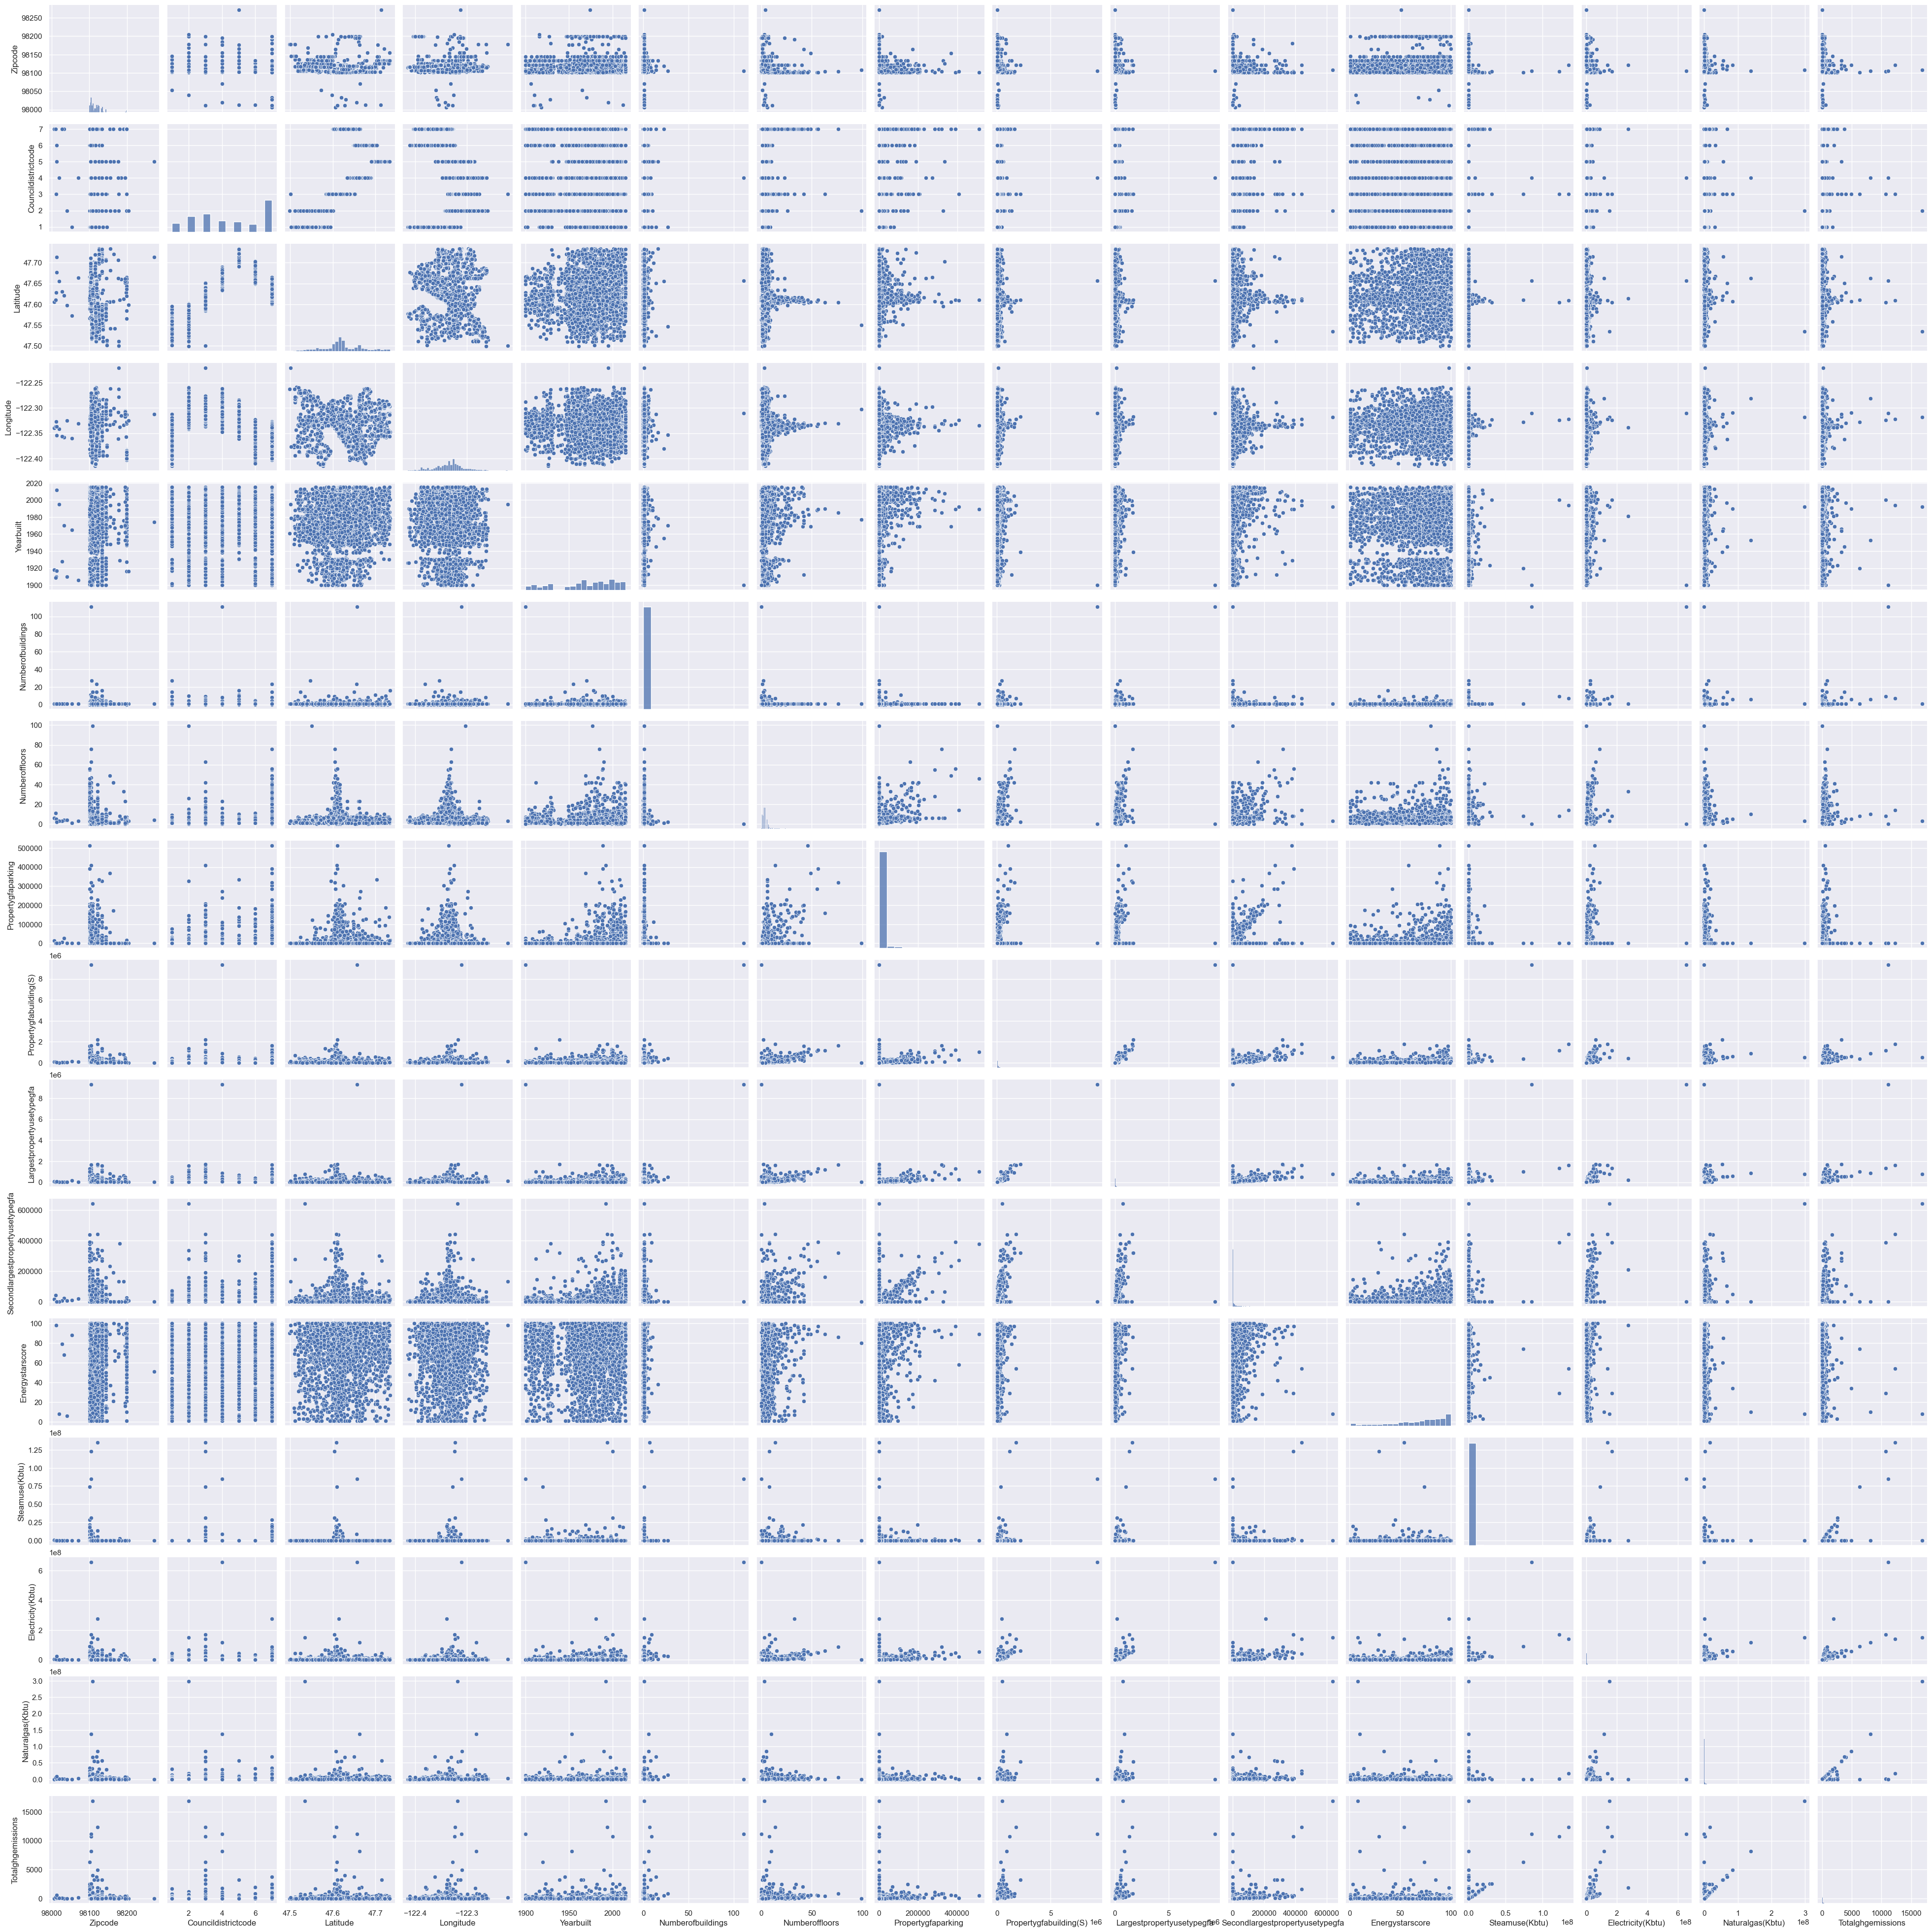

In [18]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df, height = 2.5 )
sns.set_style('ticks')

### Highly Correlated Features

In [ ]:
def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show() 
    
correlationMatrix(first_dataset)

In [ ]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
# TO BE APPLIED ON THE SET OF FEATURES ONLY!!!
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns


## Understand the data

### Visualize univariate data

In [ ]:
first_dataset.describe(include='all')

In [ ]:
boxPlotAll(first_dataset.drop(columns=['Osebuildingid']))

### Handling numerical outliers

In [ ]:
first_dataset.shape

In [ ]:
first_dataset['Longitude'].max()

In [ ]:
first_dataset[first_dataset['Zipcode']==first_dataset['Zipcode'].max()]

In [ ]:
first_dataset[first_dataset['Longitude']==first_dataset['Longitude'].max()]

In [ ]:
first_dataset.loc[first_dataset['Propertygfatotal']==first_dataset['Propertygfatotal'].max(),:]['Propertygfatotal']

In [ ]:
first_dataset.loc[first_dataset['Propertygfaparking']==first_dataset['Propertygfaparking'].max(),:]

In [ ]:
first_dataset.loc[first_dataset['Numberoffloors']==first_dataset['Numberoffloors'].max(),:]

In [ ]:
first_dataset.drop(index=1359,inplace=True)

In [ ]:
first_dataset.loc[first_dataset['Totalghgemissions']==first_dataset['Totalghgemissions'].max(),:]

In [ ]:
first_dataset.loc[first_dataset['Siteenergyuse(Kbtu)']==first_dataset['Siteenergyuse(Kbtu)'].max(),:]

In [ ]:
first_dataset.shape

In [ ]:
first_dataset[first_dataset['Siteenergyuse(Kbtu)']==0]

### Features engineering

In [ ]:
#scattered_numeric_data = explored_dataset[explored_dataset['Totalghgemissions']<=100]
pd.plotting.scatter_matrix(first_dataset, diagonal='kde', figsize=(30,30))
plt.show()

In [47]:
df_location = first_dataset[['Address', 'Zipcode', 'Neighborhood','Latitude','Longitude',
              'Siteeuiwn(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)']]

df_building_characteristics = first_dataset[['Buildingtype', 'Yearbuilt', 'Numberofbuildings','Numberoffloors',
                               'Propertygfatotal', 'Propertygfaparking','Propertygfabuilding(S)',
                              'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)', 
                               'Listofallpropertyusetypes', 'Defaultdata', 'Compliancestatus']]

df_econometrics = first_dataset[['Listofallpropertyusetypes','Largestpropertyusetype', 'Largestpropertyusetypegfa', 'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa']]

df_energy_data = first_dataset[['Energystarscore','Siteenergyuse(Kbtu)','Steamuse(Kbtu)', 'Electricity(Kbtu)','Naturalgas(Kbtu)','Totalghgemissions', 
                  'Siteeuiwn(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)', 'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)',
                  'Compliancestatus']]

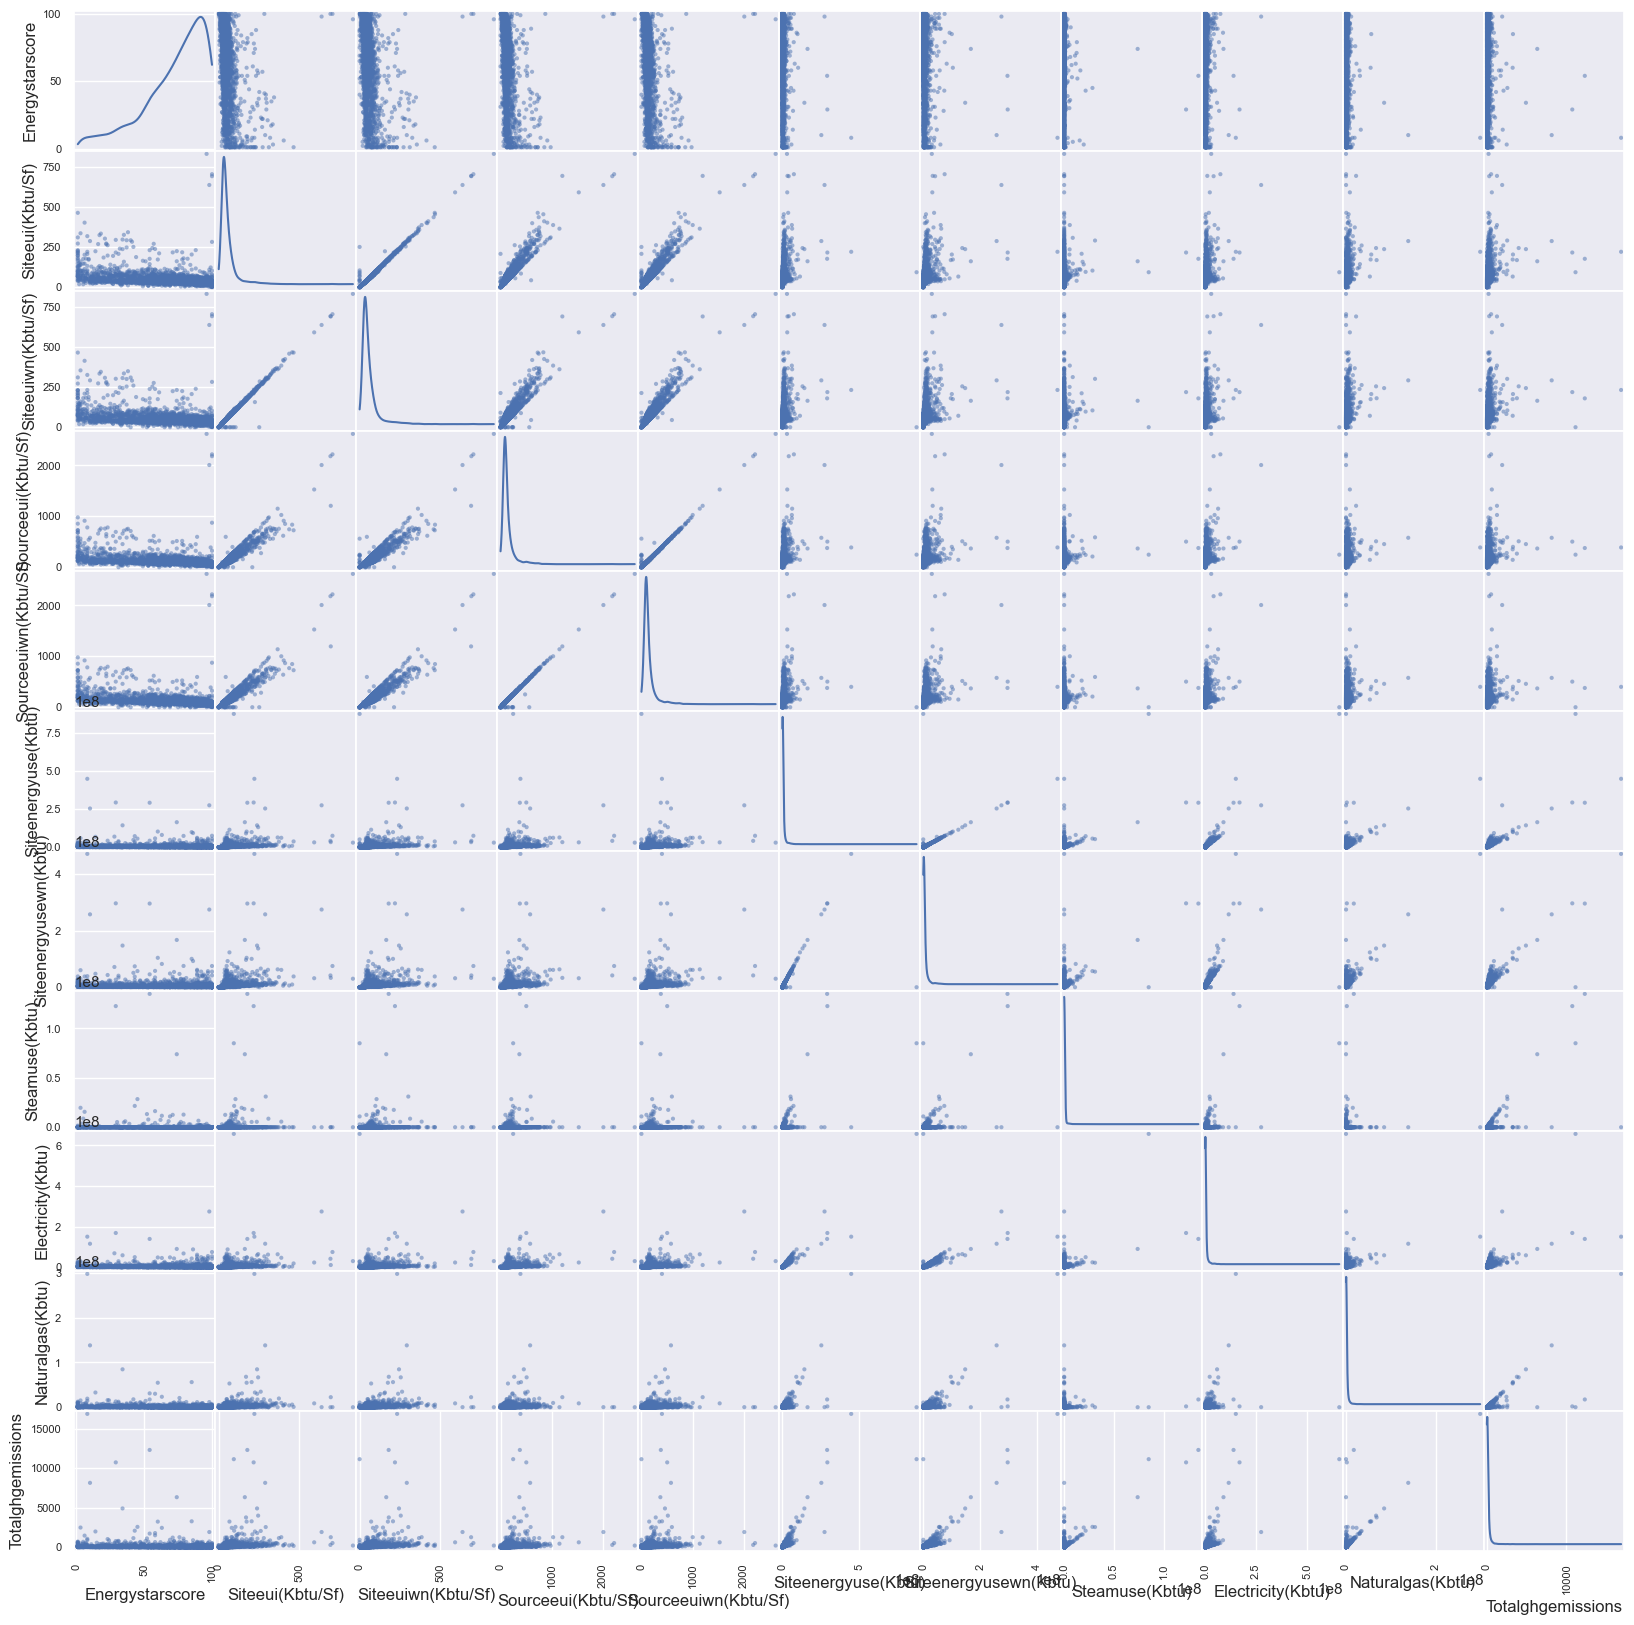

In [46]:
df = first_dataset.loc[:,'Energystarscore':]
#.drop("Totalghgemissions", axis=1).join(first_dataset.Totalghgemissions)
df = df.select_dtypes(include=['float64','int64'])
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(20,20))

plt.show()

In [35]:
def plot_scatter_matrix(dataset):
    df = dataset.join(first_dataset.Totalghgemissions)
    df = df.select_dtypes(include=['float64','int64'])
    pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(20,20))
    plt.show()

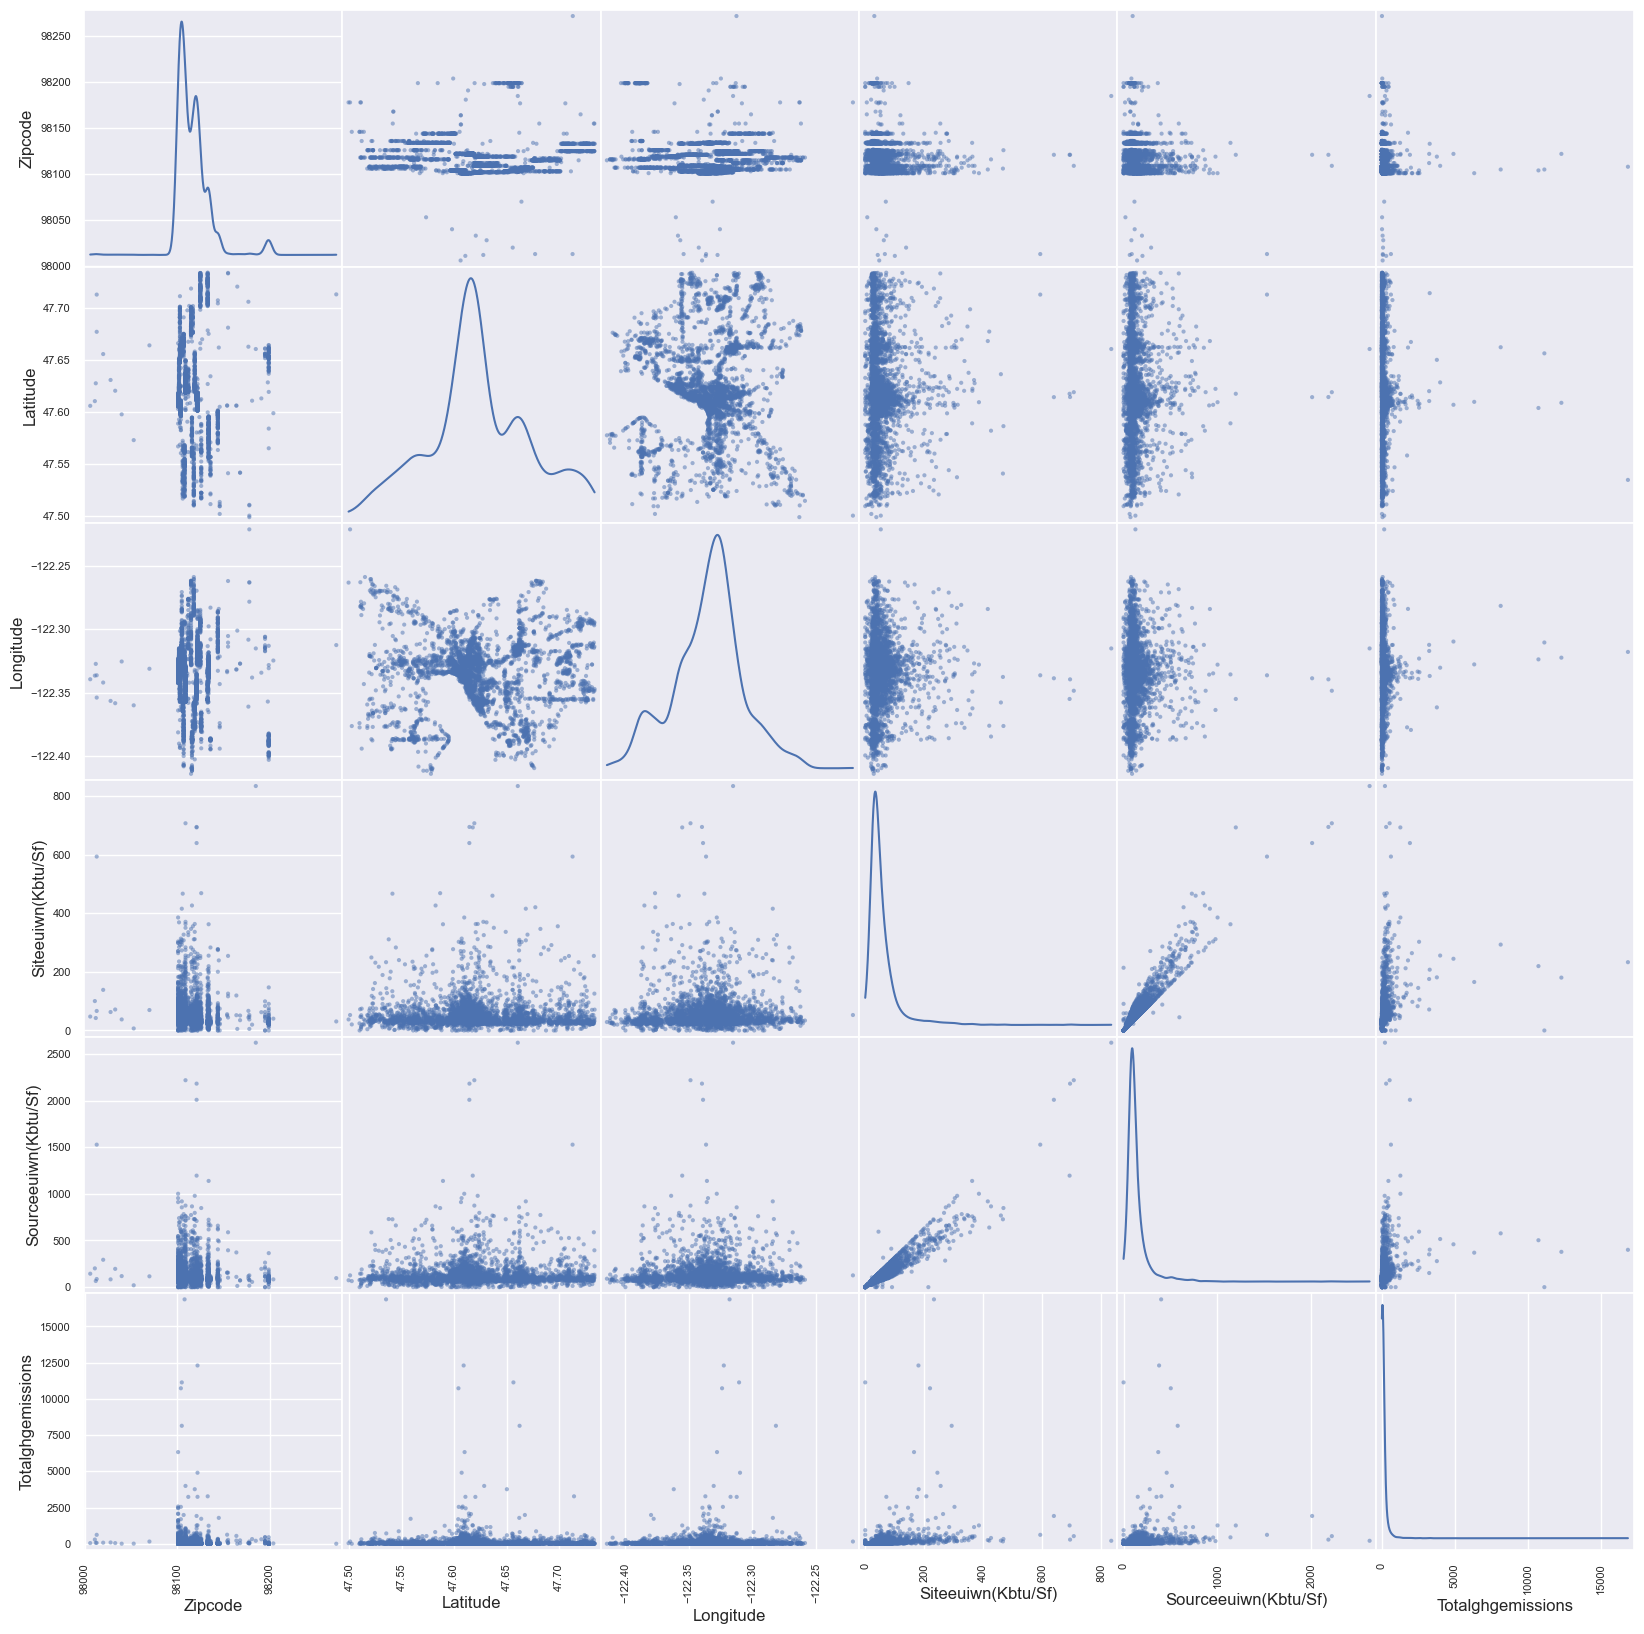

In [48]:
plot_scatter_matrix(df_location)

Site and source highly correlated ==> remove one

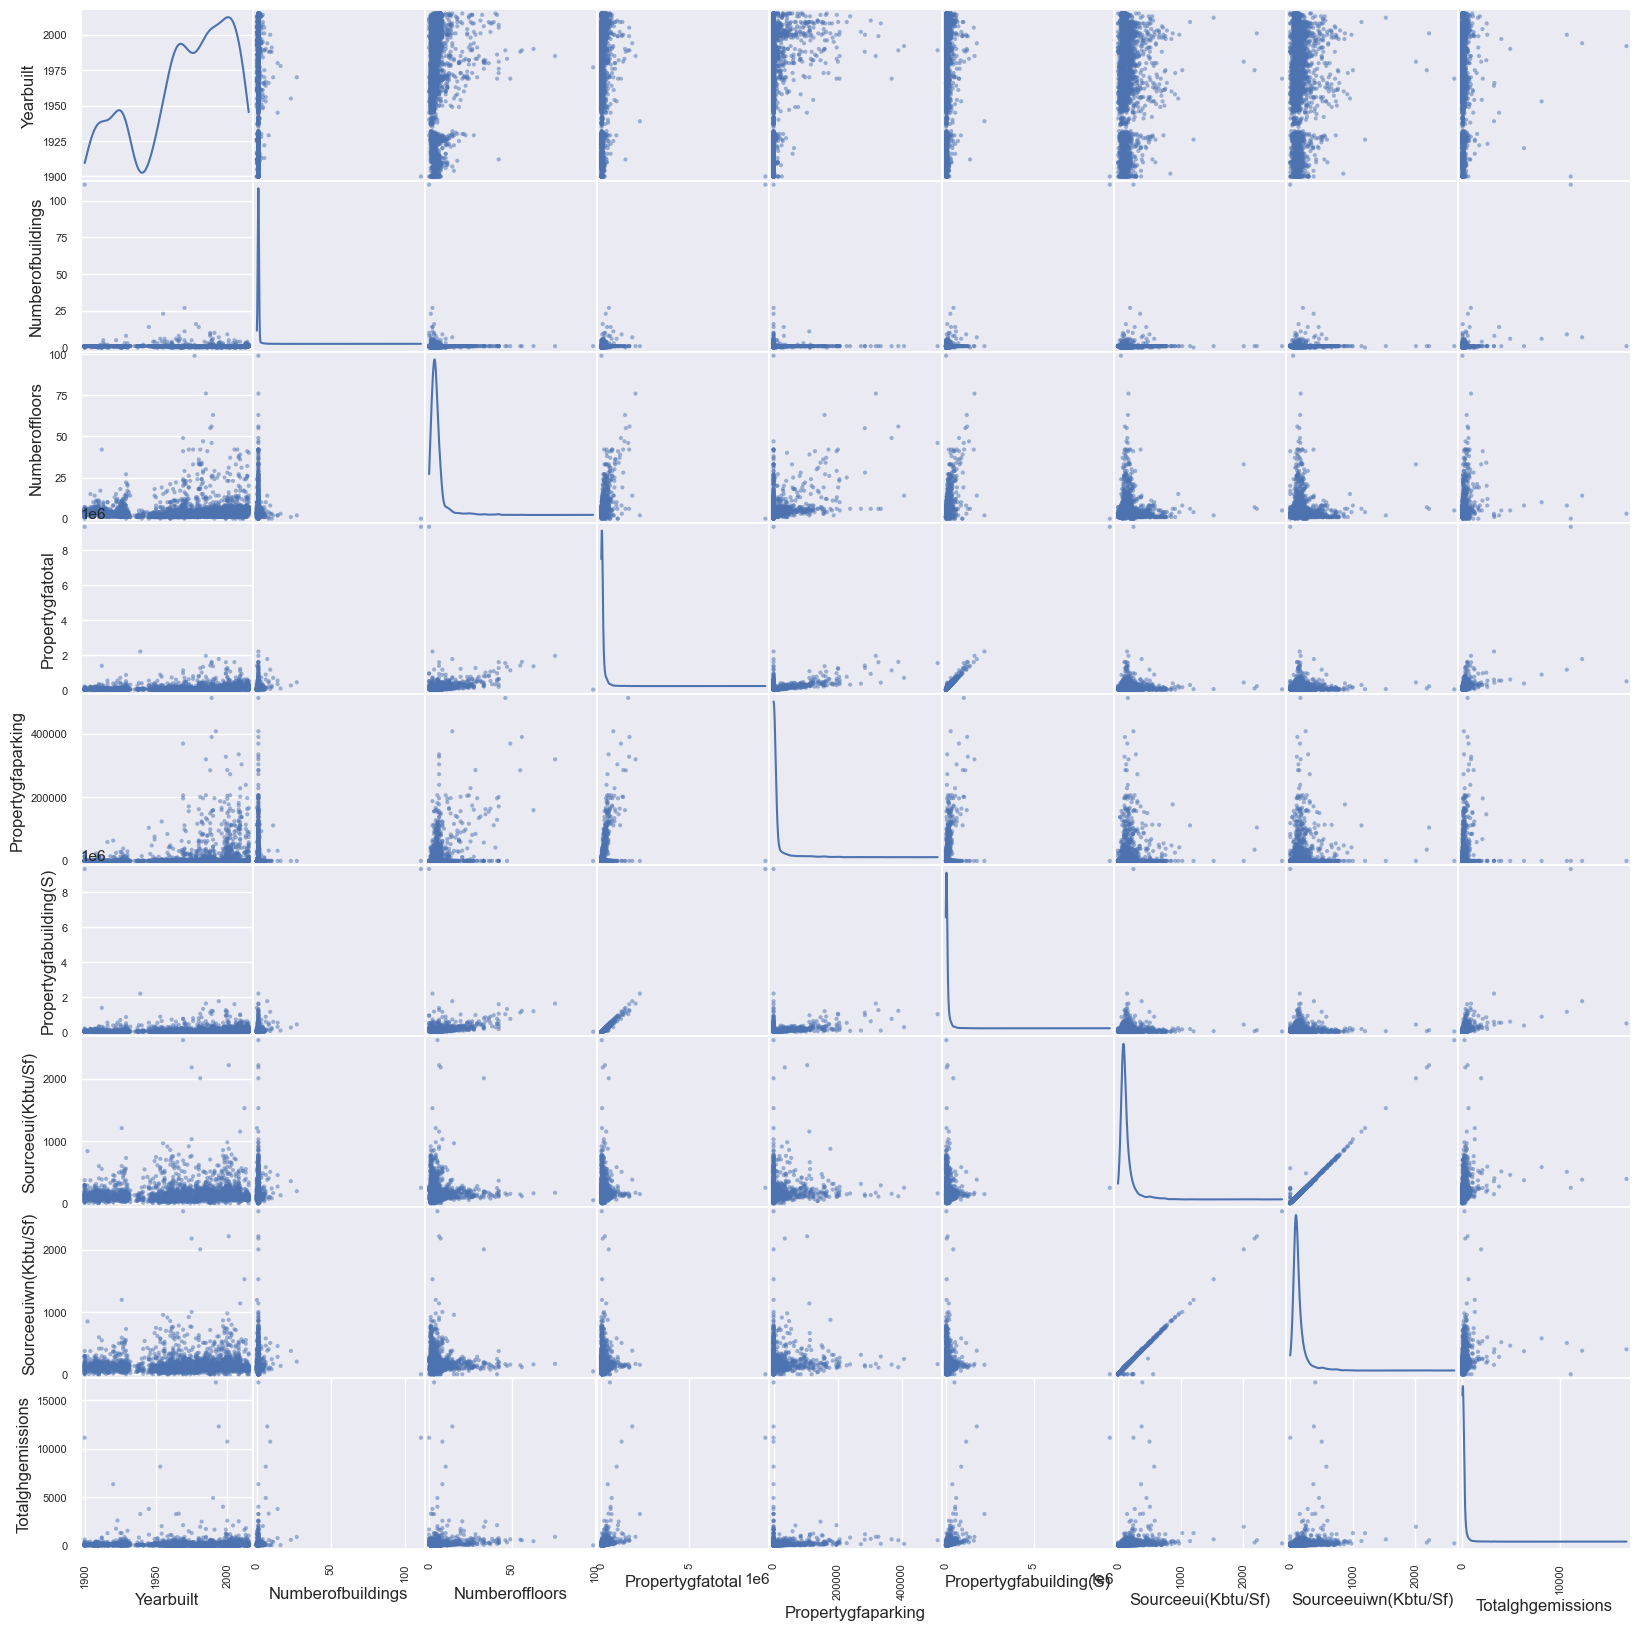

In [37]:
plot_scatter_matrix(df_building_characteristics)

very strong correlation between Propertygfatotal and Propertygfabuilding (obviously) and sourceeui and sourceeuiwn==> keep only propertygfabuilding and site energyuse

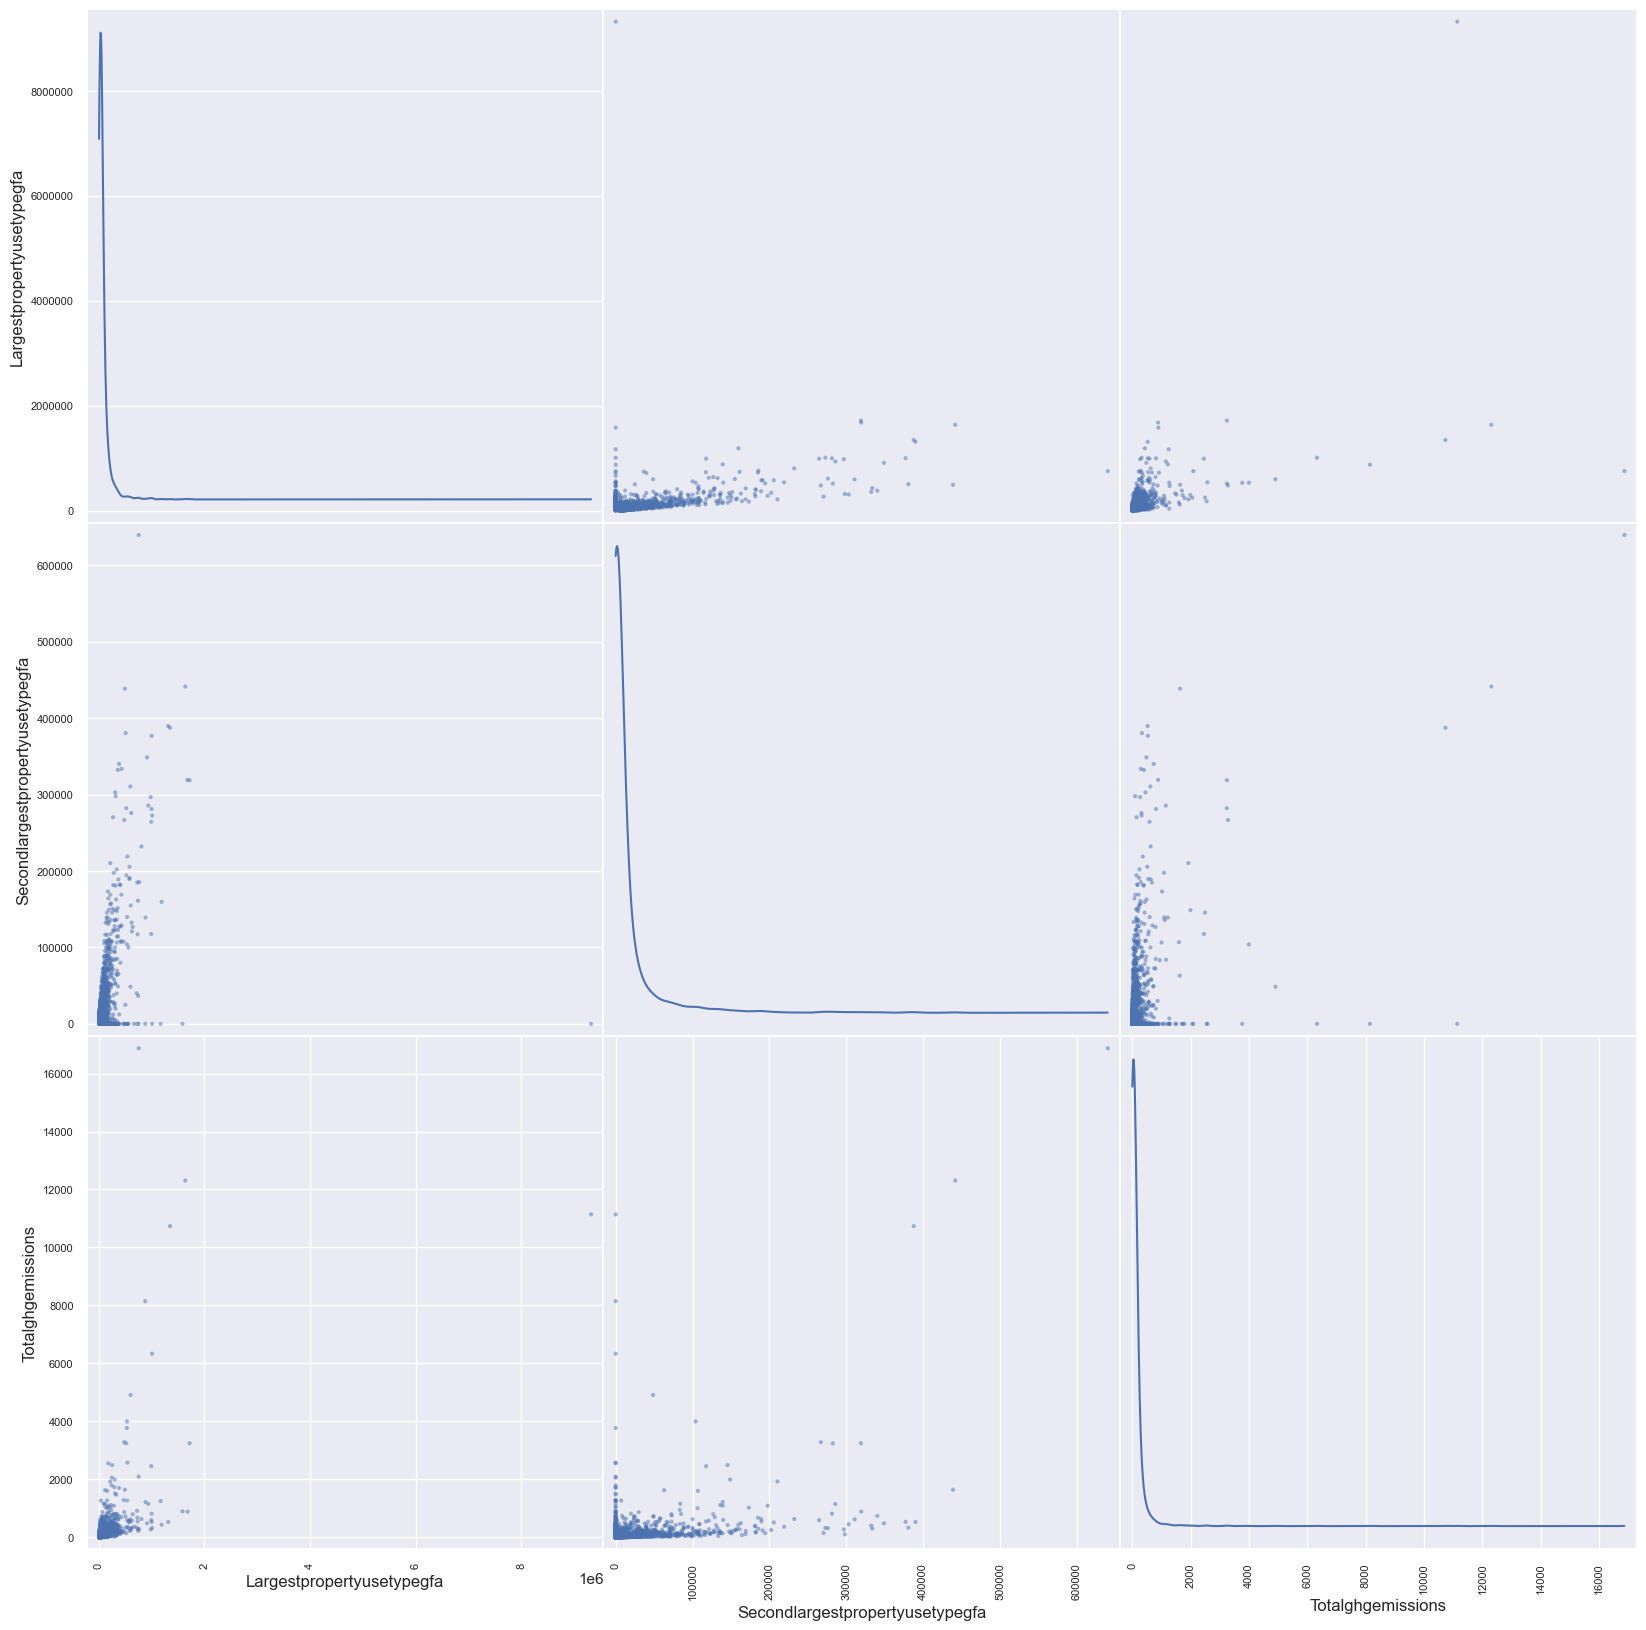

In [38]:
plot_scatter_matrix(df_econometrics)

In [51]:
first_dataset=first_dataset.drop(columns = ['Osebuildingid','Datayear', 'City', 'State','Propertygfabuilding(S)', 
                                            'Sourceeuiwn(Kbtu/Sf)','Siteenergyusewn(Kbtu)', 
                                            'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)'], axis=1)


In [52]:
first_dataset.isna().sum()

Buildingtype                         0
Primarypropertytype                  0
Propertyname                         0
Address                              0
Zipcode                             16
Councildistrictcode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
Yearbuilt                            0
Numberofbuildings                    0
Numberoffloors                       0
Propertygfatotal                     0
Propertygfaparking                   0
Listofallpropertyusetypes            0
Largestpropertyusetype               0
Largestpropertyusetypegfa            0
Secondlargestpropertyusetype         0
Secondlargestpropertyusetypegfa      0
Energystarscore                    824
Siteeui(Kbtu/Sf)                     0
Siteeuiwn(Kbtu/Sf)                   0
Siteenergyuse(Kbtu)                  0
Steamuse(Kbtu)                       0
Electricity(Kbtu)                    0
Naturalgas(Kbtu)         

In [ ]:
first_dataset.dropna()

In [ ]:
plot_scatter_matrix(df_energy_data.drop('Totalghgemissions',axis=1))

In [ ]:
energy_dict = {
    'steam_ratio': df_energy_data.loc[:,'Steamuse(Kbtu)']/df_energy_data.loc[:,'Siteenergyuse(Kbtu)'],
    'electricity_ratio': df_energy_data.loc[:,'Electricity(Kbtu)']/df_energy_data.loc[:,'Siteenergyuse(Kbtu)'],
    'liquidgas_ratio': df_energy_data.loc[:,'Naturalgas(Kbtu)']/df_energy_data.loc[:,'Siteenergyuse(Kbtu)']
}
df_energy_data = pd.DataFrame(energy_dict)
df_energy_data.insert(0, 'Osebuildingid_matched', first_dataset['Osebuildingid'])
df_energy_data.head()

In [ ]:
df_energy_data.describe()

In [ ]:
first_dataset[first_dataset['Siteenergyuse(Kbtu)']==0]

In [ ]:
first_dataset[['steamratio', 'electricityratio', 'naturalgasratio']] = df_energy_data.loc[:,['steam_ratio', 'electricity_ratio', 'liquidgas_ratio']]

In [ ]:
first_dataset.head()

In [ ]:
first_dataset.describe()

# Statistical description
## Barplot

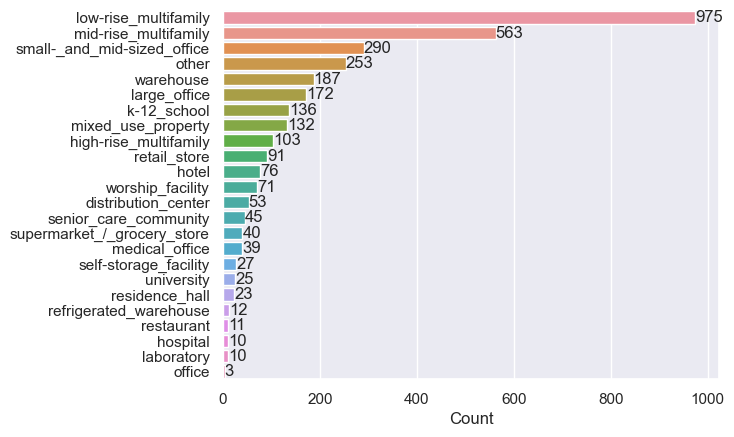

In [104]:
#Illustrate data distribution by property type
count_qualiVar = first_dataset['Primarypropertytype'].value_counts()
#count_qualiVar.values.sort()
#count_qualiVar.index
ax = sns.barplot(y=count_qualiVar.index, x=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.show()

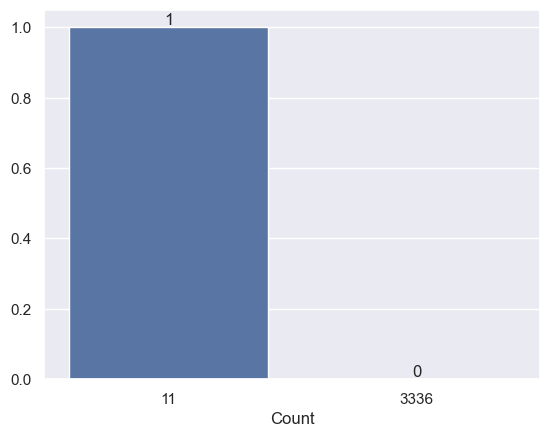

In [108]:
#Illustrate data distribution by property type
count_qualiVar = first_dataset['missing_data'].value_counts()
#count_qualiVar.values.sort()
#count_qualiVar.index
ax = sns.barplot(y=count_qualiVar.index, x=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.show()

### Dummification

Isolating non-residential buildings

In [53]:
def is_family(item):
    return "multifamily" in item or "Multifamily" in item

In [54]:
Multifamindex = first_dataset[first_dataset['Primarypropertytype'].map(is_family)].index
#Multifamindex
first_dataset.loc[Multifamindex]

Buildingtype   Primarypropertytype  \
9     multifamily_mr_(5-9)  mid-rise_multifamily   
165   multifamily_mr_(5-9)  mid-rise_multifamily   
173   multifamily_mr_(5-9)  mid-rise_multifamily   
188   multifamily_lr_(1-4)  low-rise_multifamily   
189   multifamily_mr_(5-9)  mid-rise_multifamily   
...                    ...                   ...   
3352  multifamily_lr_(1-4)  low-rise_multifamily   
3353  multifamily_mr_(5-9)  mid-rise_multifamily   
3355  multifamily_mr_(5-9)  mid-rise_multifamily   
3357  multifamily_mr_(5-9)  mid-rise_multifamily   
3358  multifamily_lr_(1-4)  low-rise_multifamily   

                      Propertyname                Address  Zipcode  \
9                    lyon_building         607_-_3rd_ave.  98104.0   
165         ywca_opportunity_place        2024_3rd_avenue  98121.0   
173                       wintonia         1431_minor_ave  98101.0   
188   cooper_school_artist's_lofts   4408_delridge_way_sw  98106.0   
189                lake_city_court      12730_33rd_ave_ne  98125.0   
...                            ...                    ...      ...   
3352             atrium_apartments  3104_south_day_street  98144.0   
3353          131910_-_liv_seattle   4717_brooklyn_ave_ne  98105.0   
3355                 raven_terrace         820_yesler_way  98104.0   
3357                broadstone_sky       4745_40th_ave_sw  98116.0   
3358                          1806       1806_23rd_avenue  98122.0   

      Councildistrictcode Neighborhood  Latitude  Longitude  Yearbuilt  ...  \
9                       7     downtown  47.60284 -122.33184       1910  ...   
165                     7     downtown  47.61316 -122.34153       2003  ...   
173                     7         east  47.61360 -122.32785       1909  ...   
188                     1     delridge  47.56379 -122.36301       1917  ...   
189                     5        north  47.72232 -122.29181       2009  ...   
...                   ...          ...       ...        ...        ...  ...   
3352                    3      central  47.59052 -122.29208       2015  ...   
3353                    4    northeast  47.66366 -122.31450       2015  ...   
3355                    3         east  47.60189 -122.32182       2015  ...   
3357                    1    southwest  47.55976 -122.38320       2015  ...   
3358                    3      central  47.61791 -122.30230       2014  ...   

      Energystarscore  Siteeui(Kbtu/Sf)  Siteeuiwn(Kbtu/Sf)  \
9                 1.0         81.500000           85.599998   
165               NaN         79.900002           83.099998   
173              34.0         83.199997           89.000000   
188              15.0         35.099998           38.599998   
189              54.0         56.599998           59.000000   
...               ...               ...                 ...   
3352              NaN         64.300003           64.300003   
3353             99.0         32.799999           35.000000   
3355             84.0         27.100000           27.100000   
3357            100.0         21.100000           21.100000   
3358             99.0         44.700001           45.000000   

      Siteenergyuse(Kbtu) Steamuse(Kbtu) Electricity(Kbtu)  Naturalgas(Kbtu)  \
9            4.573777e+06    1039735.188         2532015.0         1002026.0   
165          1.004012e+07          0.000         5502627.0         4537494.0   
173          4.189569e+06          0.000         1673151.0         2516419.0   
188          1.986611e+06          0.000         1191899.0          794712.0   
189          2.473962e+06          0.000         1555274.0          918688.0   
...                   ...            ...               ...               ...   
3352         2.181834e+06          0.000          872437.0         1309396.0   
3353         2.337651e+06          0.000         1503925.0          833726.0   
3355         2.161240e+06          0.000         2161240.0               0.0   
3357         3.552185e+06          0.000  

In [55]:
first_dataset['family_filter'] = first_dataset['Primarypropertytype'].map(is_family)

In [56]:
first_dataset.head()

Buildingtype Primarypropertytype                 Propertyname  \
0  nonresidential               hotel         mayflower_park_hotel   
1  nonresidential               hotel              paramount_hotel   
2  nonresidential               hotel      5673-the_westin_seattle   
3  nonresidential               hotel                    hotel_max   
4  nonresidential               hotel  warwick_seattle_hotel_(id8)   

           Address  Zipcode  Councildistrictcode Neighborhood  Latitude  \
0    405_olive_way  98101.0                    7     downtown  47.61220   
1  724_pine_street  98101.0                    7     downtown  47.61317   
2  1900_5th_avenue  98101.0                    7     downtown  47.61393   
3   620_stewart_st  98101.0                    7     downtown  47.61412   
4    401_lenora_st  98121.0                    7     downtown  47.61375   

   Longitude  Yearbuilt  ...  Siteeui(Kbtu/Sf)  Siteeuiwn(Kbtu/Sf)  \
0 -122.33799       1927  ...         81.699997           84.300003   
1 -122.33393       1996  ...         94.800003           97.900002   
2 -122.33810       1969  ...         96.000000           97.699997   
3 -122.33664       1926  ...        110.800003          113.300003   
4 -122.34047       1980  ...        114.800003          118.699997   

   Siteenergyuse(Kbtu)  Steamuse(Kbtu) Electricity(Kbtu) Naturalgas(Kbtu)  \
0            7226362.5      2003882.00         3946027.0        1276453.0   
1            8387933.0            0.00         3242851.0        5145082.0   
2           72587024.0     21566554.00        49526664.0        1493800.0   
3            6794584.0      2214446.25         2768924.0        1811213.0   
4           14172606.0            0.00         5368607.0        8803998.0   

   Defaultdata Compliancestatus  Totalghgemissions  family_filter  
0        False        compliant             249.98          False  
1        False        compliant             295.86          False  
2        False        compliant            2089.28          False  
3        False        compliant             286.43          False  
4        False        compliant             505.01          False  

[5 rows x 30 columns]

In [57]:
dataset_copy=first_dataset.copy()
dataset_copy.loc[:,'family_filter'].replace(to_replace=False, value='Non_residential', inplace=True)
dataset_copy.loc[:,'family_filter'].replace(to_replace=True, value='residential', inplace=True)
dataset_copy = pd.get_dummies(dataset_copy.family_filter)
dataset_copy.head()

Non_residential  residential
0                1            0
1                1            0
2                1            0
3                1            0
4                1            0

In [58]:
first_dataset = first_dataset.drop('family_filter', axis=1).join(dataset_copy)
first_dataset.head()

Buildingtype Primarypropertytype                 Propertyname  \
0  nonresidential               hotel         mayflower_park_hotel   
1  nonresidential               hotel              paramount_hotel   
2  nonresidential               hotel      5673-the_westin_seattle   
3  nonresidential               hotel                    hotel_max   
4  nonresidential               hotel  warwick_seattle_hotel_(id8)   

           Address  Zipcode  Councildistrictcode Neighborhood  Latitude  \
0    405_olive_way  98101.0                    7     downtown  47.61220   
1  724_pine_street  98101.0                    7     downtown  47.61317   
2  1900_5th_avenue  98101.0                    7     downtown  47.61393   
3   620_stewart_st  98101.0                    7     downtown  47.61412   
4    401_lenora_st  98121.0                    7     downtown  47.61375   

   Longitude  Yearbuilt  ...  Siteeuiwn(Kbtu/Sf)  Siteenergyuse(Kbtu)  \
0 -122.33799       1927  ...           84.300003            7226362.5   
1 -122.33393       1996  ...           97.900002            8387933.0   
2 -122.33810       1969  ...           97.699997           72587024.0   
3 -122.33664       1926  ...          113.300003            6794584.0   
4 -122.34047       1980  ...          118.699997           14172606.0   

   Steamuse(Kbtu)  Electricity(Kbtu) Naturalgas(Kbtu) Defaultdata  \
0      2003882.00          3946027.0        1276453.0       False   
1            0.00          3242851.0        5145082.0       False   
2     21566554.00         49526664.0        1493800.0       False   
3      2214446.25          2768924.0        1811213.0       False   
4            0.00          5368607.0        8803998.0       False   

   Compliancestatus Totalghgemissions  Non_residential  residential  
0         compliant            249.98                1            0  
1         compliant            295.86                1            0  
2         compliant           2089.28                1            0  
3         compliant            286.43                1            0  
4         compliant            505.01                1            0  

[5 rows x 31 columns]

In [59]:
first_dataset['Non_residential']= np.int64(first_dataset.loc[:,'Non_residential'])
first_dataset['Non_residential'].dtypes

dtype('int64')

In [60]:
# to change feature 'Non_residential' column index
first_dataset.insert(30, 'Non_residential', first_dataset.pop('Non_residential'))
first_dataset.drop(columns='residential', inplace=True)
first_dataset.head()

Buildingtype Primarypropertytype                 Propertyname  \
0  nonresidential               hotel         mayflower_park_hotel   
1  nonresidential               hotel              paramount_hotel   
2  nonresidential               hotel      5673-the_westin_seattle   
3  nonresidential               hotel                    hotel_max   
4  nonresidential               hotel  warwick_seattle_hotel_(id8)   

           Address  Zipcode  Councildistrictcode Neighborhood  Latitude  \
0    405_olive_way  98101.0                    7     downtown  47.61220   
1  724_pine_street  98101.0                    7     downtown  47.61317   
2  1900_5th_avenue  98101.0                    7     downtown  47.61393   
3   620_stewart_st  98101.0                    7     downtown  47.61412   
4    401_lenora_st  98121.0                    7     downtown  47.61375   

   Longitude  Yearbuilt  ...  Siteeui(Kbtu/Sf)  Siteeuiwn(Kbtu/Sf)  \
0 -122.33799       1927  ...         81.699997           84.300003   
1 -122.33393       1996  ...         94.800003           97.900002   
2 -122.33810       1969  ...         96.000000           97.699997   
3 -122.33664       1926  ...        110.800003          113.300003   
4 -122.34047       1980  ...        114.800003          118.699997   

   Siteenergyuse(Kbtu)  Steamuse(Kbtu) Electricity(Kbtu) Naturalgas(Kbtu)  \
0            7226362.5      2003882.00         3946027.0        1276453.0   
1            8387933.0            0.00         3242851.0        5145082.0   
2           72587024.0     21566554.00        49526664.0        1493800.0   
3            6794584.0      2214446.25         2768924.0        1811213.0   
4           14172606.0            0.00         5368607.0        8803998.0   

   Defaultdata Compliancestatus  Totalghgemissions  Non_residential  
0        False        compliant             249.98                1  
1        False        compliant             295.86                1  
2        False        compliant            2089.28                1  
3        False        compliant             286.43                1  
4        False        compliant             505.01                1  

[5 rows x 30 columns]

In [61]:
first_dataset.head()

Buildingtype Primarypropertytype                 Propertyname  \
0  nonresidential               hotel         mayflower_park_hotel   
1  nonresidential               hotel              paramount_hotel   
2  nonresidential               hotel      5673-the_westin_seattle   
3  nonresidential               hotel                    hotel_max   
4  nonresidential               hotel  warwick_seattle_hotel_(id8)   

           Address  Zipcode  Councildistrictcode Neighborhood  Latitude  \
0    405_olive_way  98101.0                    7     downtown  47.61220   
1  724_pine_street  98101.0                    7     downtown  47.61317   
2  1900_5th_avenue  98101.0                    7     downtown  47.61393   
3   620_stewart_st  98101.0                    7     downtown  47.61412   
4    401_lenora_st  98121.0                    7     downtown  47.61375   

   Longitude  Yearbuilt  ...  Siteeui(Kbtu/Sf)  Siteeuiwn(Kbtu/Sf)  \
0 -122.33799       1927  ...         81.699997           84.300003   
1 -122.33393       1996  ...         94.800003           97.900002   
2 -122.33810       1969  ...         96.000000           97.699997   
3 -122.33664       1926  ...        110.800003          113.300003   
4 -122.34047       1980  ...        114.800003          118.699997   

   Siteenergyuse(Kbtu)  Steamuse(Kbtu) Electricity(Kbtu) Naturalgas(Kbtu)  \
0            7226362.5      2003882.00         3946027.0        1276453.0   
1            8387933.0            0.00         3242851.0        5145082.0   
2           72587024.0     21566554.00        49526664.0        1493800.0   
3            6794584.0      2214446.25         2768924.0        1811213.0   
4           14172606.0            0.00         5368607.0        8803998.0   

   Defaultdata Compliancestatus  Totalghgemissions  Non_residential  
0        False        compliant             249.98                1  
1        False        compliant             295.86                1  
2        False        compliant            2089.28                1  
3        False        compliant             286.43                1  
4        False        compliant             505.01                1  

[5 rows x 30 columns]

In [62]:
first_dataset.nunique()

Buildingtype                          8
Primarypropertytype                  24
Propertyname                       3331
Address                            3324
Zipcode                              55
Councildistrictcode                   7
Neighborhood                         14
Latitude                           2857
Longitude                          2634
Yearbuilt                           113
Numberofbuildings                    17
Numberoffloors                       50
Propertygfatotal                   3169
Propertygfaparking                  493
Listofallpropertyusetypes           463
Largestpropertyusetype               55
Largestpropertyusetypegfa          3113
Secondlargestpropertyusetype         51
Secondlargestpropertyusetypegfa    1349
Energystarscore                     100
Siteeui(Kbtu/Sf)                   1084
Siteeuiwn(Kbtu/Sf)                 1104
Siteenergyuse(Kbtu)                3337
Steamuse(Kbtu)                      131
Electricity(Kbtu)                  3338


In [63]:
def to_dummify(df, feature):
    dummydf = pd.get_dummies(df[feature])
    df = df.drop([feature], axis=1).join(dummydf)
    df.head()
    return df

In [ ]:
copydf=first_dataset.copy()
#copydf = pd.get_dummies(copydf['Compliancestatus'])
#copydf = copydf.drop('Compliancestatus', axis=1).join(copydf)
to_dummify(copydf, 'Compliancestatus')

In [64]:
to_dummify(first_dataset,'Compliancestatus')

Buildingtype Primarypropertytype  \
0         nonresidential               hotel   
1         nonresidential               hotel   
2         nonresidential               hotel   
3         nonresidential               hotel   
4         nonresidential               hotel   
...                  ...                 ...   
3371  nonresidential_cos              office   
3372  nonresidential_cos               other   
3373  nonresidential_cos               other   
3374  nonresidential_cos  mixed_use_property   
3375  nonresidential_cos  mixed_use_property   

                             Propertyname           Address  Zipcode  \
0                    mayflower_park_hotel     405_olive_way  98101.0   
1                         paramount_hotel   724_pine_street  98101.0   
2                 5673-the_westin_seattle   1900_5th_avenue  98101.0   
3                               hotel_max    620_stewart_st  98101.0   
4             warwick_seattle_hotel_(id8)     401_lenora_st  98121.0   
...                                   ...               ...      ...   
3371                horticulture_building  1600_s_dakota_st      NaN   
3372  international_district/chinatown_cc     719_8th_ave_s      NaN   
3373                      queen_anne_pool    1920_1st_ave_w      NaN   
3374          south_park_community_center    8319_8th_ave_s      NaN   
3375          van_asselt_community_center  2820_s_myrtle_st      NaN   

      Councildistrictcode           Neighborhood  Latitude  Longitude  \
0                       7               downtown  47.61220 -122.33799   
1                       7               downtown  47.61317 -122.33393   
2                       7               downtown  47.61393 -122.33810   
3                       7               downtown  47.61412 -122.33664   
4                       7               downtown  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       greater_duwamish  47.56722 -122.31154   
3372                    2               downtown  47.59625 -122.32283   
3373                    7  magnolia_/_queen_anne  47.63644 -122.35784   
3374                    1       greater_duwamish  47.52832 -122.32431   
3375                    2       greater_duwamish  47.53939 -122.29536   

      Yearbuilt  ...  Steamuse(Kbtu)  Electricity(Kbtu)  Naturalgas(Kbtu)  \
0          1927  ...      2003882.00       3.946027e+06      1.276453e+06   
1          1996  ...            0.00       3.242851e+06      5.145082e+06   
2          1969  ...     21566554.00       4.952666e+07      1.493800e+06   
3          1926  ...      2214446.25       2.768924e+06      1.811213e+06   
4          1980  ...            0.00       5.368607e+06      8.803998e+06   
...         ...  ...             ...                ...               ...   
3371       1990  ...            0.00       5.242709e+05      3.254750e+05   
3372       2004  ...            0.00       3.965461e+05      5.537300e+05   
3373       1974  ...            0.00       1.792159e+06      3.973739e+06   
3374       1989  ...            0.00       3.488702e+05      3.706010e+05   
3375       1938  ...            0.00       4.325542e+05      7.203420e+05   

      Defaultdata Totalghgemissions Non_residential  compliant  \
0           False            249.98               1          1   
1           False            295.86               1          1   
2           False           2089.28               1          1   
3           False            286.43               1          1   
4           False            505.01               1          1   
...           ...               ...             ...        ...   
3371         True             20.94               1          0   
3372        False             32.17               1          1   
3373        False            223.54               1          1   
3374        False             22.11               1          1   
3375        False             41.27       

In [109]:
to_dummify(first_dataset, 'Buildingtype')

Primarypropertytype                         Propertyname  \
0                  hotel                 mayflower_park_hotel   
1                  hotel                      paramount_hotel   
2                  hotel              5673-the_westin_seattle   
3                  hotel                            hotel_max   
4                  hotel          warwick_seattle_hotel_(id8)   
...                  ...                                  ...   
3371              office                horticulture_building   
3372               other  international_district/chinatown_cc   
3373               other                      queen_anne_pool   
3374  mixed_use_property          south_park_community_center   
3375  mixed_use_property          van_asselt_community_center   

               Address  Zipcode  Councildistrictcode           Neighborhood  \
0        405_olive_way  98101.0                    7               downtown   
1      724_pine_street  98101.0                    7               downtown   
2      1900_5th_avenue  98101.0                    7               downtown   
3       620_stewart_st  98101.0                    7               downtown   
4        401_lenora_st  98121.0                    7               downtown   
...                ...      ...                  ...                    ...   
3371  1600_s_dakota_st      NaN                    2       greater_duwamish   
3372     719_8th_ave_s      NaN                    2               downtown   
3373    1920_1st_ave_w      NaN                    7  magnolia_/_queen_anne   
3374    8319_8th_ave_s      NaN                    1       greater_duwamish   
3375  2820_s_myrtle_st      NaN                    2       greater_duwamish   

      Latitude  Longitude  Yearbuilt  Numberofbuildings  ...  non-compliant  \
0     47.61220 -122.33799       1927                1.0  ...              0   
1     47.61317 -122.33393       1996                1.0  ...              0   
2     47.61393 -122.33810       1969                1.0  ...              0   
3     47.61412 -122.33664       1926                1.0  ...              0   
4     47.61375 -122.34047       1980                1.0  ...              0   
...        ...        ...        ...                ...  ...            ...   
3371  47.56722 -122.31154       1990                1.0  ...              0   
3372  47.59625 -122.32283       2004                1.0  ...              0   
3373  47.63644 -122.35784       1974                1.0  ...              0   
3374  47.52832 -122.32431       1989                1.0  ...              0   
3375  47.53939 -122.29536       1938                1.0  ...              0   

      Totalghgemissions  campus multifamily_hr_(10+) multifamily_lr_(1-4)  \
0                249.98       0                    0                    0   
1                295.86       0                    0                    0   
2               2089.28       0                    0                    0   
3                286.43       0                    0                    0   
4                505.01       0                    0                    0   
...                 ...     ...                  ...                  ...   
3371              20.94       0                    0                    0   
3372              32.17       0                    0                    0   
3373             223.54       0                    0                    0   
3374              22.11       0                    0                    0   
3375              41.27       0                    0                    0   

      multifamily_mr_(5-9) nonresidential  nonresidential_cos  \
0                        0              1                   0   
1                        0              1                   0   
2                        0              1                   0   
3                        0              1                   0   
4                        0              1                   0   
...        

In [68]:
#first_dataset = to_dummify(first_dataset, 'Defaultdata')
#first_dataset = first_dataset.drop('family_filter', axis=1).join(dataset_copy)
first_dataset.head()

Buildingtype Primarypropertytype                 Propertyname  \
0  nonresidential               hotel         mayflower_park_hotel   
1  nonresidential               hotel              paramount_hotel   
2  nonresidential               hotel      5673-the_westin_seattle   
3  nonresidential               hotel                    hotel_max   
4  nonresidential               hotel  warwick_seattle_hotel_(id8)   

           Address  Zipcode  Councildistrictcode Neighborhood  Latitude  \
0    405_olive_way  98101.0                    7     downtown  47.61220   
1  724_pine_street  98101.0                    7     downtown  47.61317   
2  1900_5th_avenue  98101.0                    7     downtown  47.61393   
3   620_stewart_st  98101.0                    7     downtown  47.61412   
4    401_lenora_st  98121.0                    7     downtown  47.61375   

   Longitude  Yearbuilt  ...  Siteeuiwn(Kbtu/Sf)  Siteenergyuse(Kbtu)  \
0 -122.33799       1927  ...           84.300003            7226362.5   
1 -122.33393       1996  ...           97.900002            8387933.0   
2 -122.33810       1969  ...           97.699997           72587024.0   
3 -122.33664       1926  ...          113.300003            6794584.0   
4 -122.34047       1980  ...          118.699997           14172606.0   

   Steamuse(Kbtu)  Electricity(Kbtu) Naturalgas(Kbtu) Compliancestatus  \
0      2003882.00          3946027.0        1276453.0        compliant   
1            0.00          3242851.0        5145082.0        compliant   
2     21566554.00         49526664.0        1493800.0        compliant   
3      2214446.25          2768924.0        1811213.0        compliant   
4            0.00          5368607.0        8803998.0        compliant   

   Totalghgemissions Non_residential  False  True  
0             249.98               1      1     0  
1             295.86               1      1     0  
2            2089.28               1      1     0  
3             286.43               1      1     0  
4             505.01               1      1     0  

[5 rows x 31 columns]

In [71]:
first_dataset=to_dummify(first_dataset, 'Compliancestatus')

In [73]:
first_dataset = first_dataset.drop("Totalghgemissions", axis=1).join(first_dataset.Totalghgemissions)
first_dataset.head()

Buildingtype Primarypropertytype                 Propertyname  \
0  nonresidential               hotel         mayflower_park_hotel   
1  nonresidential               hotel              paramount_hotel   
2  nonresidential               hotel      5673-the_westin_seattle   
3  nonresidential               hotel                    hotel_max   
4  nonresidential               hotel  warwick_seattle_hotel_(id8)   

           Address  Zipcode  Councildistrictcode Neighborhood  Latitude  \
0    405_olive_way  98101.0                    7     downtown  47.61220   
1  724_pine_street  98101.0                    7     downtown  47.61317   
2  1900_5th_avenue  98101.0                    7     downtown  47.61393   
3   620_stewart_st  98101.0                    7     downtown  47.61412   
4    401_lenora_st  98121.0                    7     downtown  47.61375   

   Longitude  Yearbuilt  ...  Electricity(Kbtu)  Naturalgas(Kbtu)  \
0 -122.33799       1927  ...          3946027.0         1276453.0   
1 -122.33393       1996  ...          3242851.0         5145082.0   
2 -122.33810       1969  ...         49526664.0         1493800.0   
3 -122.33664       1926  ...          2768924.0         1811213.0   
4 -122.34047       1980  ...          5368607.0         8803998.0   

   Non_residential  False True compliant  error_-_correct_default_data  \
0                1      1    0         1                             0   
1                1      1    0         1                             0   
2                1      1    0         1                             0   
3                1      1    0         1                             0   
4                1      1    0         1                             0   

  missing_data  non-compliant  Totalghgemissions  
0            0              0             249.98  
1            0              0             295.86  
2            0              0            2089.28  
3            0              0             286.43  
4            0              0             505.01  

[5 rows x 34 columns]

In [74]:
explored_data = first_dataset.drop(columns = [True, 'non-compliant'])

In [75]:
explored_data.head()

Buildingtype Primarypropertytype                 Propertyname  \
0  nonresidential               hotel         mayflower_park_hotel   
1  nonresidential               hotel              paramount_hotel   
2  nonresidential               hotel      5673-the_westin_seattle   
3  nonresidential               hotel                    hotel_max   
4  nonresidential               hotel  warwick_seattle_hotel_(id8)   

           Address  Zipcode  Councildistrictcode Neighborhood  Latitude  \
0    405_olive_way  98101.0                    7     downtown  47.61220   
1  724_pine_street  98101.0                    7     downtown  47.61317   
2  1900_5th_avenue  98101.0                    7     downtown  47.61393   
3   620_stewart_st  98101.0                    7     downtown  47.61412   
4    401_lenora_st  98121.0                    7     downtown  47.61375   

   Longitude  Yearbuilt  ...  Siteenergyuse(Kbtu)  Steamuse(Kbtu)  \
0 -122.33799       1927  ...            7226362.5      2003882.00   
1 -122.33393       1996  ...            8387933.0            0.00   
2 -122.33810       1969  ...           72587024.0     21566554.00   
3 -122.33664       1926  ...            6794584.0      2214446.25   
4 -122.34047       1980  ...           14172606.0            0.00   

   Electricity(Kbtu)  Naturalgas(Kbtu) Non_residential False  compliant  \
0          3946027.0         1276453.0               1     1          1   
1          3242851.0         5145082.0               1     1          1   
2         49526664.0         1493800.0               1     1          1   
3          2768924.0         1811213.0               1     1          1   
4          5368607.0         8803998.0               1     1          1   

  error_-_correct_default_data  missing_data  Totalghgemissions  
0                            0             0             249.98  
1                            0             0             295.86  
2                            0             0            2089.28  
3                            0             0             286.43  
4                            0             0             505.01  

[5 rows x 32 columns]

 ______ split between test and train ________________

### Piled barplot 

Samples distribution by Neighborhood

In [ ]:
count_qualiVar = first_dataset['Neighborhood'].value_counts()
#count_qualiVar.values.sort()
#count_qualiVar.index
ax = sns.barplot(y=count_qualiVar.index, x=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.xlabel ('Count')
plt.title('Buildings distribution over Seattle city neighborhoods')
plt.show()

-------------------------------------------------------
visualize all consumed energy sources by neighborhood

## Scatterplot

In [ ]:
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
sns.scatterplot(data=first_dataset, x='Non_residential', y='Totalghgemissions',
 hue='Neighborhood')
plt.xticks(rotation =60)
plt.title('Buildings emissions evolution acc to Seattle neighborhood and prime use(residential or not)')
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#plt.ylim(0, 2500)
plt.show()

In [ ]:
x_surface = np.log(first_dataset['Propertygfabuilding(S)'])
x_steam = np.log(first_dataset[first_dataset['Steamuse(Kbtu)']>0]['Steamuse(Kbtu)'])

In [ ]:
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
sns.histplot(data=first_dataset, x='Yearbuilt', y='Totalghgemissions',
 hue='Non_residential')
plt.xticks(rotation =60)
plt.title('Buildings emissions evolution per buildings type and prime use(residential or not)')

plt.show()

In [ ]:
outliers_ghgemissionintensity = first_dataset.loc[(first_dataset['Compliancestatus']== 'Compliant') & (first_dataset['Ghgemissionsintensity']>5)]

In [ ]:
first_dataset.loc[[353, 1077, 1147, 1483, 1756, 2336, 2414, 2459, 2545, 2886, 3040],'Listofallpropertyusetypes']

In [ ]:
#ordre_prptype = first_dataset.groupby('Compliancestatus')['Primarypropertytype'].median().sort_values().index
x_steam = np.log(first_dataset[first_dataset['Steamuse(Kbtu)']>0]['Steamuse(Kbtu)'])
plt.figure(figsize=[15,15])
#plt.subplot(111)
sns.scatterplot(y=x_steam,  x = x_surface, hue = 'Neighborhood', 
                data = first_dataset)
plt.xticks( size=14)
plt.yticks(size=14)
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.title('Use of steam energy for non-residential buildings')
plt.show()

In [ ]:
#ordre_prptype = first_dataset.groupby('Compliancestatus')['Primarypropertytype'].median().sort_values().index
## Stripplot : scatterplot with a categorical variable
plt.figure(figsize=[15,15])
#plt.subplot(111)
sns.stripplot(y='Steamuse(Kbtu)',  hue = 'Non_residential', x = 'Neighborhood', data = first_dataset)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#plt.ylim(0, 2e5)
plt.show()


In [ ]:
first_dataset['Largestpropertyusetypegfa'].describe()

### Total emissions distribution

In [ ]:
# -------------------------------------------------------------------------------
# 5.2.2. Representing continuous variables using histograms
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
sns.displot(first_dataset["Totalghgemissions"], kde=False)
plt.show()
# -------------------------------------------------------------------------------

In [ ]:
x_emissions = np.log(first_dataset[first_dataset['Totalghgemissions']>0]['Totalghgemissions'])

In [ ]:
# -------------------------------------------------------------------------------
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
sns.displot(x_emissions, kde=True)
plt.show()
# -------------------------------------------------------------------------------

In [ ]:
first_dataset.loc[first_dataset['Totalghgemissions']==first_dataset['Totalghgemissions'].max()]['Propertygfatotal']

In [ ]:
first_dataset[first_dataset.Non_residential==1]

In [ ]:
# -------------------------------------------------------------------------------
# 5.2.2. Representing continuous variables using histograms
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
sns.displot(first_dataset[first_dataset["Non_residential"]==1]['Totalghgemissions'], 
            kde=False)
plt.show()
# -------------------------------------------------------------------------------

Bi-modal distribution indicates two 'clustered' distributions in the set of TotaGHGemissions according to another categorical data -- > if we plot log() histo without all 'multifamily' residencies, we get a unimodal gaussian --> need dummification!

In [ ]:
x_emissions = np.log(first_dataset[(first_dataset['Totalghgemissions']>0)&
                                   (first_dataset['Non_residential']==1)]['Totalghgemissions'])

In [ ]:
# -------------------------------------------------------------------------------
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
sns.displot(x_emissions, kde=True)
plt.show()
# -------------------------------------------------------------------------------

## Boxplot

In [ ]:
sns.boxplot(x='Primarypropertytype', y="Sourceeui(Kbtu/Sf)", data=first_dataset, 
               showfliers = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.boxplot(x='Primarypropertytype', y="Totalghgemissions", data=first_dataset, 
               showfliers =True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#study of normal lohgarithm of Total GHG emissions
x= first_dataset[first_dataset['Non_residential']==1]
#x = first_dataset[(first_dataset.Totalghgemissions > 0)
 #                        & (first_dataset.Totalghgemissions <3000)]

In [ ]:
# -------------------------------------------------------------------------------
sns.boxplot(x='Primarypropertytype', y=x_emissions, data=first_dataset, 
               showfliers = False)
plt.xticks(rotation=90)
plt.show()

### View univariate box plots

In [ ]:
def classComparePlot(df, class_name, plotType='density'):
    '''Show comparative plots comparing the distribution of each feature for each class.  plotType can be 'density' or 'hist' '''

    # Get the parameters for the plots
    numcols = len(df.columns) - 1
    unit_size = 5
    classes = df[class_name].nunique()           # no of uniques classes
    class_values = df[class_name].unique()       # unique class values

    print('Comparative histograms for',class_values)
    
    # Make the plots
    colors = plt.cm.get_cmap('tab10').colors
    fig = plt.figure(figsize=(unit_size,numcols*unit_size))
    ax = [None]*numcols 
    i = 0
    for col_name in df.columns:
        minVal = df[col_name].min()
        maxVal = df[col_name].max()
        
        if col_name != class_name:                
            ax[i] = fig.add_subplot(numcols,1,i+1)   
            for j in range(classes):   
                selectedCols = df[[col_name,class_name]]
                filteredRows = selectedCols.loc[(df[class_name]==class_values[j])]
                values = filteredRows[col_name]
                values.plot(kind=plotType,ax=ax[i],color=[colors[j]], alpha = 0.8, label=class_values[j], range=(minVal,maxVal))
                ax[i].set_title(col_name)
                ax[i].grid() 
            ax[i].legend()
            i += 1        

    plt.show()

In [ ]:
# View class split
classComparePlot(first_dataset[["Yearbuilt","Non_residential"]],'Neighborhood', plotType='hist')

In [ ]:
## Diagramme en bâtons
plt.figure(figsize=(5,5))
first_dataset['Compliancestatus'].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

In [ ]:
# 5.2. Representing continuous quantitative variables 
# 5.2.1. Central tendency analysis & dispersion measurements
for cat in first_dataset['Compliancestatus'].unique():
    subset = first_dataset.loc[first_dataset['Compliancestatus'] == cat, :] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['Ghgemissionsintensity'].mean())
    print("med:\n",subset['Ghgemissionsintensity'].median())
    print("mod:\n",subset['Ghgemissionsintensity'].mode())
    print("var:\n",subset['Ghgemissionsintensity'].var(ddof=0))
    print("ect:\n",subset['Ghgemissionsintensity'].std(ddof=0))
    #subset["Ghgemissionsintensity"].value_counts(normalize=True).plot(kind='bar',width=0.1)
    #plt.show()
    subset.boxplot(column="Ghgemissionsintensity", showfliers = True, vert=False)
    plt.show()


Handling outliers

Drop non-compliant buildings?

## Numerical binning

In [ ]:
# Allocate Propertygfabuilding(S) to bins
binned = pd.cut(first_dataset["Propertygfabuilding(S)"], bins = [3.6360e+03,1.9990e+4,8.441e+04,9.325e+06], labels = ["S","M","L"])

# Add the binned values as a new categorical feature
first_dataset["Surface_range"] = binned

In [ ]:
#first_dataset.head()
#Scatterplot
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
sns.scatterplot(data=first_dataset[first_dataset['Surface_range']=='S'], x='Neighborhood', y=x_emissions,
 hue='Non_residential')
plt.xticks(rotation =60)
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
first_dataset['Surface_range'].hist(figsize=(7,7))
plt.show()

In [ ]:
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
sns.scatterplot(data=first_dataset, x='Neighborhood', y=first_dataset['Propertygfabuilding(S)'],
 hue='Primarypropertytype')
plt.xticks(rotation =60)
plt.title('Buildings emissions evolution per buildings type, surface and prime use')
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()

### Univariate numerical data distribution

In [ ]:
first_dataset.columns

In [ ]:
nb_of_bins_Sturges=np.round(1+np.log2(len(first_dataset)))
nb_of_bins_Sturges

In [ ]:
def histPlotAll(df):
    '''Show histograms for each feature''' 
    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])
    nb_of_bins_Sturges=np.round(1+np.log2(len(df)))
    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.hist(figsize=(layout_cols*unit_size,layout_rows*unit_size), layout=(layout_rows,layout_cols),
           bins = int(nb_of_bins_Sturges) )
            
    plt.show() 

In [ ]:
histPlotAll(first_dataset.drop(columns=['Osebuildingid']))

In [ ]:
def calcul_skewness(dataset):
    object_cols = dataset.select_dtypes(include=['int64', 'float64'])
    for col in object_cols:
        subseries = first_dataset[col]
        print(col, 'data skewness =', subseries.skew())
calcul_skewness(first_dataset.drop(columns=['Osebuildingid']))

In [ ]:
## Projection on a table for study of empirical distribution
Total_GHG_emission_projection = present_variable_in_tab(first_dataset, 
                                                'Totalghgemissions', 'bldg_total_emi')
Total_GHG_emission_projection.index = np.arange(1,len(Total_GHG_emission_projection)+1)
Year_projection = present_variable_in_tab(first_dataset, 'Yearbuilt', 
                                                        'Construction_year')
Year_projection.index = np.arange(1,len(Year_projection)+1)

In [ ]:
first_dataset.groupby('Numberoffloors').mean()
pd.crosstab(Year_projection['Construction_year'], Total_GHG_emission_projection.bldg_total_emi, dropna=True)

Le plus d'outlier semblent exister au niveau des 'campus' avec usage principal en tant qu'hopitaux ou universites, sachant que les usages second et tertiaires seraient la meme(a evrifier)
En moyenne la distribution semble se concentrer autour des memes valeurs 

## Jointplot

In [ ]:
#study of GHG emission intensity evolution with the consumed energy sources
sns.set(style='white', color_codes=True)
sns.jointplot(data=first_dataset[first_dataset['Sourceeui(Kbtu/Sf)']<=1000], x='Sourceeui(Kbtu/Sf)',
              y='Ghgemissionsintensity', kind = 'reg', line_kws={'color': 'red'})
plt.show()

In [ ]:
#log_ghgemissions = np.log(first_dataset.loc[:,'Ghgemissionsintensity'])
sns.set(style='white', color_codes=True)
sns.jointplot(data=first_dataset, x=x_surface,
              y=x_emissions, kind = 'reg', line_kws={'color': 'red'})
plt.xlabel('log(surgace)', size=12)
plt.ylabel('log(emissions)', size=12)
plt.show()

In [ ]:
pairplot_data = first_dataset.drop(columns = ['Zipcode', 'Yearbuilt', 'Energystarscore'])
sns.pairplot(data=pairplot_data, hue = 'Primarypropertytype', height = 2.5 )
sns.set_style('ticks')

# Exploratory Analysis of the residual errors

In [ ]:
resid_dataset = first_dataset.loc[[1505, 1469, 1602, 1304, 1238, 1589,  583, 2203, 1036, 2819, 2213,
            1580,  275, 2143, 2347, 3170, 1623, 3293, 1670,  273, 1370, 2368,
            1902,  601, 1327, 1009,  294, 2008, 1508, 1141, 2260,  564, 2493,
            1058, 3361, 1272, 2944, 2196, 1351, 1588, 1050, 2653], :]
histPlotAll(resid_dataset)

In [ ]:
resid_dataset['Surface_range']

## Data selection

Isolating all numerical values related to energy consumption

In [ ]:
df = first_dataset.select_dtypes(include=['int64', 'float64'])
df = df.loc[:, 'Yearbuilt':]
df.isna().sum()

In [ ]:
# Function to filter out components with positive numeric values
def is_not_nan(item):
    output = (isinstance(item, float) or isinstance(item, int)) and item >= 0
    return output

In [ ]:
cond1 = (df['Siteenergyusewn(Kbtu)'].map(is_not_nan)) 
cond1[cond1==False]

In [ ]:
explored_dataset = df[cond1]
explored_dataset.shape

In [ ]:
explored_dataset.loc[explored_dataset.Totalghgemissions==0]

Site consumption but no emissions?? 

In [ ]:
explored_dataset = explored_dataset[(explored_dataset.Totalghgemissions>0)]
                                    #&(explored_dataset.Totalghgemissions<3000)]

In [ ]:
print('Data shape is :', first_dataset.shape, '\n',
     'explored dataset shape is :', explored_dataset.shape)
explored_dataset.describe(include='all')

 ## Saving Data for Exploratory analysis

In [ ]:
explored_dataset.to_csv('/Users/souha_kassab/OC_project3/static/csv/explored_dataset_multifamily_822023.csv')

# Evaluate model errors

In [ ]:
resid_df=first_dataset.loc[[1505, 1469, 1602, 1304, 1238, 1589,  583, 2203, 1036, 2819, 2213,
            1580,  275, 2143, 2347, 3170, 1623, 3293, 1670,  273, 1370, 2368,
            1902,  601, 1327, 1009,  294, 2008, 1508, 1141, 2260,  564, 2493,
            1058, 3361, 1272, 2944, 2196, 1351, 1588, 1050, 2653],:]
resid_df.describe(include='all')

In [ ]:
scattered_numeric_data = df_building_characteristics.select_dtypes(include=['int64', 'float64'])
resid_errors = [1505, 1469, 1602, 1304, 1238, 1589,  583, 2203, 1036, 2819, 2213,
            1580,  275, 2143, 2347, 3170, 1623, 3293, 1670,  273, 1370, 2368,
            1902,  601, 1327, 1009,  294, 2008, 1508, 1141, 2260,  564, 2493,
            1058, 3361, 1272, 2944, 2196, 1351, 1588, 1050, 2653]
pd.plotting.scatter_matrix(scattered_numeric_data.loc[resid_errors], diagonal='kde', figsize=(30,30))
plt.show()

In [ ]:
scattered_numeric_data = df_energy_data.select_dtypes(include=['int64', 'float64'])
resid_errors = [1505, 1469, 1602, 1304, 1238, 1589,  583, 2203, 1036, 2819, 2213,
            1580,  275, 2143, 2347, 3170, 1623, 3293, 1670,  273, 1370, 2368,
            1902,  601, 1327, 1009,  294, 2008, 1508, 1141, 2260,  564, 2493,
            1058, 3361, 1272, 2944, 2196, 1351, 1588, 1050, 2653]
pd.plotting.scatter_matrix(scattered_numeric_data.loc[resid_errors], diagonal='kde', figsize=(30,30))
plt.show()

In [ ]:
scattered_numeric_data = df_location.select_dtypes(include=['int64', 'float64'])
resid_errors = [1505, 1469, 1602, 1304, 1238, 1589,  583, 2203, 1036, 2819, 2213,
            1580,  275, 2143, 2347, 3170, 1623, 3293, 1670,  273, 1370, 2368,
            1902,  601, 1327, 1009,  294, 2008, 1508, 1141, 2260,  564, 2493,
            1058, 3361, 1272, 2944, 2196, 1351, 1588, 1050, 2653]
pd.plotting.scatter_matrix(scattered_numeric_data.loc[resid_errors], diagonal='kde', figsize=(30,30))
plt.show()

In [ ]:
scattered_numeric_data = df_econometrics.select_dtypes(include=['int64', 'float64'])
resid_errors = [1505, 1469, 1602, 1304, 1238, 1589,  583, 2203, 1036, 2819, 2213,
            1580,  275, 2143, 2347, 3170, 1623, 3293, 1670,  273, 1370, 2368,
            1902,  601, 1327, 1009,  294, 2008, 1508, 1141, 2260,  564, 2493,
            1058, 3361, 1272, 2944, 2196, 1351, 1588, 1050, 2653]
pd.plotting.scatter_matrix(scattered_numeric_data.loc[resid_errors], diagonal='kde', figsize=(30,30))
plt.show()

## Spotting multicolinearity

2. Multicolinearity
    A situation where features in my input set ( X) are strongly correlated with each other, to the extent that you can predict one input feature from another input feature. How to spot it? 
	- Related Features : binary(gender for instance) , variables which are the result of an arithmetic operation on other features, repetition (same units), dummy (1-hot encoded), etc..
	  
	- Spot Highly Correlated Features (Use measures of correlation to understand the correlations between input features )
	  
		- dataset.corr(): compute the correlation between features
		  
		- pd.plotting.scatter_matrix(): plot a scatter matrix
		  
		- display a correlation heatmap: https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6518926-identify-the-problem-of-multicollinearity#/id/r-6543233

In [ ]:
numeric_data = explored_dataset.dropna()

In [ ]:
numeric_data[numeric_data['Totalghgemissions']<=100].hist(figsize=(20,20))
plt.show()

In [ ]:
numeric_data[numeric_data['Totalghgemissions']>100].hist(figsize=(20,20))
plt.show()

In [ ]:
#scattered_numeric_data = explored_dataset[explored_dataset['Totalghgemissions']<=100]
pd.plotting.scatter_matrix(scattered_numeric_data.loc[:, 'Siteenergyuse(Kbtu)':], diagonal='kde', figsize=(30,30))
plt.show()

### Related Features

In [ ]:
explored_dataset.drop(columns=['Electricity(Kwh)', 'Naturalgas(Therms)', 'residential'], inplace=True)

In [ ]:
explored_dataset.isna().sum()

In [ ]:
#explored_dataset[explored_dataset['Largestpropertyusetypegfa'].isna()]
##for now
explored_dataset = explored_dataset.dropna()
explored_dataset.describe()

In [ ]:
explored_dataset.loc[:, :'Naturalgas(Kbtu)'].corr()

In [ ]:
highly_corr_cols = correlatedFeatures(explored_dataset.loc[:,:'Totalghgemissions'], 0.85)

# PCA

In [77]:
explored_data.to_csv('/Users/souha_kassab/OC_project3/static/csv/explored_dataset_20230211.csv')

In [80]:
explored_dataset = pd.read_csv('/Users/souha_kassab/OC_project3/static/csv/explored_dataset_20230211.csv', 
                               index_col=[0])

In [83]:
explored_dataset.columns

Index(['Buildingtype', 'Primarypropertytype', 'Propertyname', 'Address',
       'Zipcode', 'Councildistrictcode', 'Neighborhood', 'Latitude',
       'Longitude', 'Yearbuilt', 'Numberofbuildings', 'Numberoffloors',
       'Propertygfatotal', 'Propertygfaparking', 'Listofallpropertyusetypes',
       'Largestpropertyusetype', 'Largestpropertyusetypegfa',
       'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa',
       'Energystarscore', 'Siteeui(Kbtu/Sf)', 'Siteeuiwn(Kbtu/Sf)',
       'Siteenergyuse(Kbtu)', 'Steamuse(Kbtu)', 'Electricity(Kbtu)',
       'Naturalgas(Kbtu)', 'Non_residential', 'False', 'compliant',
       'error_-_correct_default_data', 'missing_data', 'Totalghgemissions'],
      dtype='object')

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data split

In [91]:
## Data split
XX = explored_dataset.select_dtypes(include=['float64','int64']).dropna()
X = XX.iloc[:, :-1].values
#first_7dataset.iloc[:, -3]
X[:5]

array([[ 9.81010000e+04,  7.00000000e+00,  4.76122000e+01,
        -1.22337990e+02,  1.92700000e+03,  1.00000000e+00,
         1.20000000e+01,  8.84340000e+04,  0.00000000e+00,
         8.84340000e+04,  0.00000000e+00,  6.00000000e+01,
         8.16999969e+01,  8.43000031e+01,  7.22636250e+06,
         2.00388200e+06,  3.94602700e+06,  1.27645300e+06,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 9.81010000e+04,  7.00000000e+00,  4.76131700e+01,
        -1.22333930e+02,  1.99600000e+03,  1.00000000e+00,
         1.10000000e+01,  1.03566000e+05,  1.50640000e+04,
         8.38800000e+04,  1.50640000e+04,  6.10000000e+01,
         9.48000031e+01,  9.79000015e+01,  8.38793300e+06,
         0.00000000e+00,  3.24285100e+06,  5.14508200e+06,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 9.81010000e+04,  7.00000000e+00,  4.76139300e+01,
        -1.22338100e+02,  1.9

In [92]:
X.shape

(2520, 23)

In [93]:
#columns in features variable
features = XX.columns[:-1]
features

Index(['Zipcode', 'Councildistrictcode', 'Latitude', 'Longitude', 'Yearbuilt',
       'Numberofbuildings', 'Numberoffloors', 'Propertygfatotal',
       'Propertygfaparking', 'Largestpropertyusetypegfa',
       'Secondlargestpropertyusetypegfa', 'Energystarscore',
       'Siteeui(Kbtu/Sf)', 'Siteeuiwn(Kbtu/Sf)', 'Siteenergyuse(Kbtu)',
       'Steamuse(Kbtu)', 'Electricity(Kbtu)', 'Naturalgas(Kbtu)',
       'Non_residential', 'False', 'compliant', 'error_-_correct_default_data',
       'missing_data'],
      dtype='object')

In [94]:
# Instantiate scaler
scaler = StandardScaler()

## Scaling

In [95]:
X_scaled = scaler.fit_transform(X)
idx = ["mean", "std"]
#reduction et centrage
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9   ...   13   14   15  \
mean  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  ...  0.0  0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       16   17   18   19   20   21   22  
mean  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  0.0  

[2 rows x 23 columns]

In [96]:
np.where(np.isnan(X_scaled))

(array([], dtype=int64), array([], dtype=int64))

## ACP instanciation

In [97]:
#99% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)

## Variance

In [98]:
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()
print(scree_cum)

x_list = range(1, len(scree)+1)
list(x_list)

[24.62 13.52 11.21  7.03  6.74  5.23  4.84  4.55  4.12  3.59  3.46  3.08
  2.25  1.62  1.37  1.07  1.  ]
[25. 38. 49. 56. 63. 68. 73. 78. 82. 85. 89. 92. 94. 96. 97. 98. 99.]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

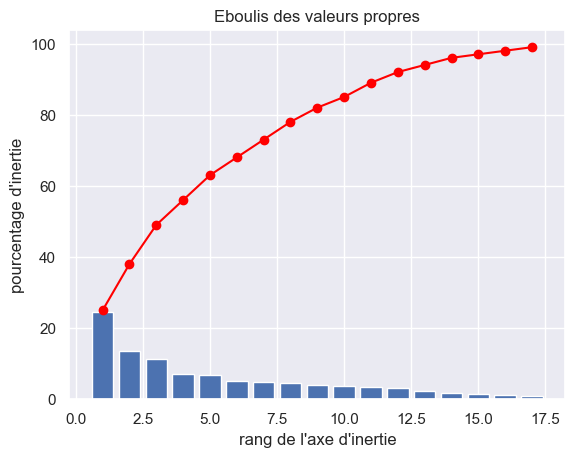

In [99]:
##plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Components

In [100]:
pcs = pca.components_
pcs

array([[-4.38986513e-02,  8.23564371e-02, -1.58891396e-02,
         5.06456554e-03,  7.40156619e-02,  9.72386691e-02,
         2.62894082e-01,  3.73422412e-01,  2.45948279e-01,
         3.77516702e-01,  3.50757849e-01, -2.88642842e-02,
         1.80081449e-01,  1.74021447e-01,  3.68982231e-01,
         1.93254245e-01,  3.81045970e-01,  2.03547498e-01,
         1.04220800e-01,  4.81547133e-02,  4.80840922e-02,
        -4.81547133e-02, -0.00000000e+00],
       [-1.30165073e-03, -1.18082606e-01, -9.73354047e-02,
         8.91398765e-02, -1.37918911e-02,  1.01679459e-02,
        -3.61153255e-02,  3.67408131e-02, -1.49374441e-03,
         5.30291855e-02,  1.89659643e-02,  7.40352522e-02,
        -1.71040770e-02, -1.52803682e-02,  5.18534952e-02,
         3.59742641e-02,  4.19534893e-02,  4.00156115e-02,
         1.45217748e-01, -5.62158828e-01, -5.44084588e-01,
         5.62158828e-01, -0.00000000e+00],
       [ 7.31941744e-03, -1.29859315e-01, -7.86917449e-02,
         7.86502646e-02, -1.6

In [101]:
##Pandas version
pcs = pd.DataFrame(pcs)
#pcs
##Features labels on cols
pcs.columns = features[:]
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Zipcode  Councildistrictcode  Latitude  Longitude  Yearbuilt  \
F1     -0.04                 0.08     -0.02       0.01       0.07   
F2     -0.00                -0.12     -0.10       0.09      -0.01   
F3      0.01                -0.13     -0.08       0.08      -0.17   
F4     -0.11                -0.61     -0.52       0.29      -0.12   
F5      0.19                 0.11      0.33      -0.09       0.07   
F6      0.63                -0.24     -0.26      -0.40       0.48   
F7     -0.22                -0.17      0.24       0.53       0.50   
F8     -0.06                 0.12     -0.03      -0.12      -0.32   
F9      0.47                -0.06      0.28       0.46      -0.01   
F10    -0.42                -0.07     -0.14      -0.34       0.28   
F11     0.11                 0.09      0.01      -0.01      -0.21   
F12     0.28                -0.08     -0.17       0.08      -0.37   
F13    -0.01                 0.21     -0.18       0.11       0.28   
F14    -0.10                -0.62      0.55      -0.31      -0.13   
F15    -0.01                -0.01      0.02      -0.01      -0.09   
F16    -0.02                -0.02      0.03       0.01       0.00   
F17     0.05                -0.18      0.14      -0.04      -0.02   

     Numberofbuildings  Numberoffloors  Propertygfatotal  Propertygfaparking  \
F1                0.10            0.26              0.37                0.25   
F2                0.01           -0.04              0.04               -0.00   
F3                0.05           -0.25             -0.23               -0.21   
F4                0.13           -0.09              0.02               -0.10   
F5                0.46           -0.22             -0.12               -0.36   
F6               -0.12           -0.05              0.00                0.03   
F7               -0.01            0.04             -0.02                0.04   
F8               -0.33           -0.05             -0.07               -0.10   
F9                0.08           -0.24              0.04                0.15   
F10               0.45           -0.23             -0.05                0.16   
F11               0.58            0.07              0.07                0.19   
F12               0.27            0.33              0.03                0.01   
F13               0.12            0.47              0.02               -0.62   
F14              -0.03            0.17              0.13               -0.14   
F15              -0.00           -0.28              0.22               -0.49   
F16               0.05            0.13             -0.31                0.04   
F17               0.01            0.48             -0.28                0.03   

     Largestpropertyusetypegfa  ...  Siteeuiwn(Kbtu/Sf)  Siteenergyuse(Kbtu)  \
F1                        0.38  ...                0.17                 0.37   
F2                        0.05  ...               -0.02                 0.05   
F3                       -0.19  ...                0.50                 0.15   
F4                        0.06  ...               -0.24                 0.10   
F5                       -0.02  ...               -0.15                 0.26   
F6                       -0.01  ...                0.02                 0.03   
F7                       -0.05  ...                0.07                 0.00   
F8                       -0.06  ...               -0.12                 0.20   
F9                        0.01  ...                0.00                -0.04   
F10                      -0.11  ...                0.12                -0.07   
F11                       0.04  ...               -0.15                -0.11   
F12                       0.00  ...                0.23                -0.07   
F13                       0.10  ...               -0.02                -0.02   
F14                       0.19  ...               -0.00                -0.00   
F15                       0.11  ...                0.06                -0.18   
F16                      -0.44  ...      

## Correlation graph

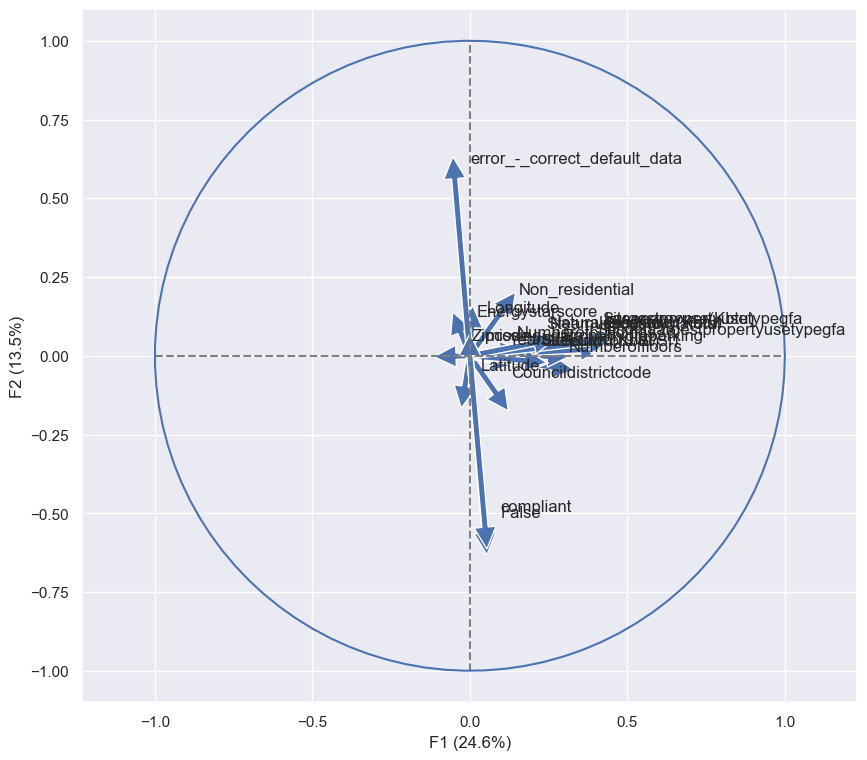

In [102]:
##Define graph axis
x_y = (0,1)
correlation_graph(pca, x_y, features)

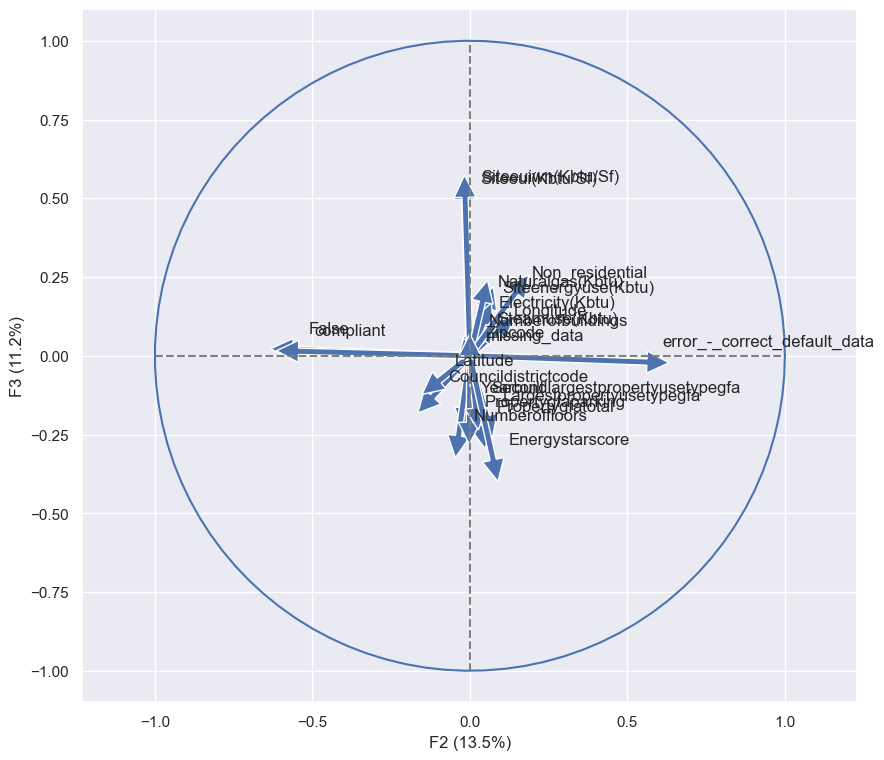

In [103]:
##Exploring F2 and F3
correlation_graph(pca, (1,2), features)

Consommation et emission strongly correlated entre elles
Elec et gaz liquide anti-correlated
Vapeur (energies fossiles et emisison aussi)

## Projection

Votre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)
Variables concernees: 'OSEBuildingID', 'Address',  'Neighborhood',  'BuildingType', 'YearBuilt', 'LargestPropertyUseType' ; 
NaturalGas(kBtu): 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'
Miscellaneous: 'ComplianceStatus', 'DataYear': Whether a property has met energy benchmarking requirements for the current reporting year.

# Linear Regression
## LR with log-normal on Totalghgemissions, all the features

Linear regression with manual SVD, all datas

### Choice of features

In [ ]:
explored_dataset.head()

In [ ]:
reg_cols = ['Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 
            'Electricity(Kbtu)', 'Naturalgas(Kbtu)', 'Totalghgemissions']

In [ ]:
linear_model_dataset = explored_dataset[reg_cols]

### Data separation

In [ ]:
del Atrain, btrain, Atest, btest, A, b

In [ ]:
H = linear_model_dataset[linear_model_dataset['Totalghgemissions']>0]
b = H.iloc[:, -1] # Total emissions
b = np.log(abs(b))
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
# Permute
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
# Separate data
n = int(len(H)*4/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [ ]:
train_sort_ind = np.argsort(btrain)
test_sort_ind = np.argsort(btest)

### Data normalization..?

In [ ]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
std_scale = preprocessing.StandardScaler().fit(Atrain)
A_train_std = std_scale.transform(Atrain)
A_test_std = std_scale.transform(Atest)

In [ ]:
A_train_std.mean(axis=0)

### SVD computation

In [ ]:
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b

In [ ]:
print('Eigen values = ', S)

In [ ]:
# -----------------------------------------------------
# Train
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(np.arange(1, n+1), btrain.iloc[train_sort_ind], 'x', color ='r', markersize = 10, label ='y_emissions' )
plt.plot(np.arange(1, n+1), Atrain[train_sort_ind]@xtilde1, '-', color = 'b', linewidth = 2 , label ='y_head_prediction')
plt.xlabel('index')
plt.ylabel('b_train')
plt.title('l')
plt.legend(title = 'train set')
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest.iloc[test_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest[test_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.title('')
plt.legend(title='test set')
plt.show()
# -----------------------------------------------------

### Error measurements

In [ ]:
MAE_train = sum(abs(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1)) /  len(btrain)
MAE_test = sum(abs(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1)) / len(btest)

print( 'Mean absolute error on the test set =', MAE_test,
      '\nMean absolute error on the train set =', MAE_train,
      '\nThe absolute error between test and train model is:', abs(MAE_test - MAE_train))

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

In [ ]:
RMSE_train = np.sqrt(sum(np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2))/len(btrain))

In [ ]:
RMSLE_train = np.sqrt(sum(np.power((np.log(1+btrain.iloc[train_sort_ind] / 1+Atrain[train_sort_ind]@xtilde1)), 2)/2)/len(btrain))
print('Root mean square error =', RMSE_train,
     '\n', 'Root mean square logarithmic error =',RMSLE_train )

In [ ]:
RMSE_test = np.sqrt(sum(np.power(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1, 2))/len(btest))
RMSE_test

In [ ]:
abs(RMSE_test - RMSE_train)

On sait que la RMSE penalise les grosses erreurs sur le modele.. outliers problem?

In [ ]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

In [ ]:
plt.plot(np.arange(1, len(btrain)+1), abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]), 'g-',
         linewidth =1, label ='train set')
#plt.plot(np.arange(1, len(btest)+1), abs(Atest[test_sort_ind]@xtilde1-btest.iloc[test_sort_ind]), 'k--',
 #        linewidth =1, label = 'test set')
plt.legend(title='l1_error')
plt.xlabel('row rank')
plt.ylabel('Error_l1norm')
plt.xticks
plt.show()

In [ ]:
trainset_error_df = pd.DataFrame({'l1_error': abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]),
                                  'l2_error': np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2),
                                 })
#l1_error = abs(Atrain[train_sort_ind]@xtilde1-btrain)


# replace column name because it is the error value not the Total emission value

In [ ]:
trainset_error_df['l1_error_classes'] = pd.qcut(trainset_error_df['l1_error'], 10)

In [ ]:
trainset_error_df.groupby('l1_error_classes')['l1_error']

In [ ]:
trainset_error_df['l1_error_classes']

In [ ]:
trainset_error_df 

In [ ]:
classes_emissions_error = l1_error_train.groupby('error_classes')["Totalghgemissions"].median().sort_values().index
# Boxplot errors per quantile
plt.figure(figsize=(8,8))
sns.boxplot(x="Totalghgemissions", 
            y="error_classes", 
            showfliers=False,
            orient='h', 
            order=classes_emissions_error, 
            data=l1_error_train)
#plt.savefig('/Users/souha_kassab/OC_project2/static/figs/fig3.png')

In [ ]:
l1_error_qty = l1_error_train.groupby('error_classes').count()
#classes_emissions_error
l1_error_qty

In [ ]:
l1_error_train['error_classes'] = pd.qcut(l1_error_train['Totalghgemissions'], 10)

In [ ]:
(l1_error_train['Totalghgemissions']).max()

In [ ]:
taille_classe = ((l1_error_train['Totalghgemissions']).max()-(l1_error_train['Totalghgemissions']).min())/10
groupes = [] # va recevoir les données agrégées à afficher
#for nutriVal in _subdata_nutrigrades_notNaN['nutrition_score_fr_100g'].unique():

# on calcule des tranches allant de -15 au nutriscore maximum 
tranches = np.arange((l1_error_train['Totalghgemissions']).min(), (l1_error_train['Totalghgemissions']).max(),
                    1.89)

tranches += int(taille_classe/2) # on décale les tranches d'une demi taille de classe
indices = np.digitize(l1_error_train['Totalghgemissions'], tranches) # associe chaque solde à son numéro de classe  

In [ ]:
l1_error_train.loc[indices==ind, 'Totalghgemissions']

In [ ]:
for ind, tr in enumerate(tranches):
    print(ind, tr)
    qtity = l1_error_train.loc[indices==ind, 'Totalghgemissions']
    #qtity = l1_error_train.loc[indices==ind,'Totalghgemissions']
    if len(qtity)>0:
        g = {
            'value': qtity,
            'class_center': tr-(taille_classe)/2,
            'size': len(qtity),
        }
        groupes.append(g)

In [ ]:
indices[3]

In [ ]:
plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["value"] for g in groupes],
            positions= [g["class_center"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["class_center"],+100,"(n={})".format(g["size"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

## LR with reduced matrix of features

### Choice of features 
Looking for correlated variables

In [ ]:
#Spot highly correlated features
linear_model_dataset.corr()

In [ ]:
pairplot_data = linear_model_dataset[linear_model_dataset['Totalghgemissions']>0]
sns.pairplot(data=pairplot_data, height = 2.5)
sns.set_style('ticks')
#pd.plotting.scatter_matrix(linear_model_dataset, diagonal='kde')

From ACP, we see that Siteneryuse, electricty  are higly correlated with F1, Natural Gas alot with F2 and steam energy with F3, whilst correlation table shows a lot of correlation between electricity and total site use on one hand, and normalized site use  of energy with natural gas consumption on the other. steam consumption seems to be the least correlated to the lot but still strongly correlated with a coefficient of around 0.68.
Site energy use normalized on 30 year weather conditions average might be more relaible than that of a one year correlation with the different source utilisation

In [ ]:
##Choose new data
reg_cols = reg_cols = ['Steamuse(Kbtu)', 'Siteenergyuse(Kbtu)', 'Naturalgas(Kbtu)', 'Totalghgemissions']
reduced_linear_model_dataset = explored_dataset[reg_cols]

### Data separation

In [ ]:
del Atrain, btrain, Atest, btest, A, b, xtilde1

In [ ]:
H = reduced_linear_model_dataset[linear_model_dataset['Totalghgemissions']>0]
b = H.iloc[:, -1] # Total emissions
b = np.log(abs(b))
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
# Permute
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
# Separate data
n = int(len(H)*3/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [ ]:
train_sort_ind = np.argsort(btrain)
test_sort_ind = np.argsort(btest)

### SVD computation

In [ ]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain.iloc[train_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain[train_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_train')
plt.legend()
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(n, n+len(btest)), btest.iloc[test_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(n, n+len(btest)), Atest[test_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.legend()
plt.show()
# -----------------------------------------------------

In [ ]:
xtilde1

### Error measurements
#### Mean Average Error 

In [ ]:
MAE_test = sum(abs(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1)) / len(btest)
MAE_train = sum(abs(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)
#print('Mean absolute error is :', MAE)
# do this for test and for train and compare!

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

#### Root mean-squared error

In [ ]:
RMSE_train = np.sqrt(sum(np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2))/len(btrain))
RMSE_train

In [ ]:
RMSE_test = np.sqrt(sum(np.power(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1, 2))/len(btest))
RMSE_test

In [ ]:
abs(RMSE_test - RMSE_train)

#### R2 error

In [ ]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

### Error distribution

In [ ]:
plt.plot(np.arange(1, len(btrain)+1), np.log(abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind])), 'g-',
         linewidth =1, label ='train set')
#plt.plot(np.arange(n, len(btest)+n), np.log(abs(Atest[test_sort_ind]@xtilde1-btest.iloc[test_sort_ind])), 'k--',
 #        linewidth =1, label = 'test set')
plt.legend(title='l1_error')
plt.xlabel('row rank')
plt.ylabel('Error_l1norm')
#plt.xlim([500, 900])
plt.show()

In [ ]:
# Checking outliers on error
dist_l1_error = df_nutriscore_components.groupby('nutriscore_classes')['additives_n'].median().index

plt.figure(figsize=(7,5))
sns.boxplot(x="additives_n", 
            y="nutriscore_classes", 
            showfliers=False,
            orient='h', 
            order = dist_additv_nutriscore,
            data=df_nutriscore_components);

In [ ]:
l1_error_train_df = (np.log(abs(Atrain[train_sort_ind]@xtilde1 - btrain.iloc[train_sort_ind])))
#l1_error_train_df.iloc[750:800]


In [ ]:
l1_error_train_df[:]

In [ ]:
# looking for elements located at indecies 750-800
#btrain.iloc[750:800] 
((np.log(abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]))).iloc[750:800])

In [ ]:
plt.plot(np.arange(1, len(btrain)+1), np.log(np.power(btrain-Atrain@xtilde1, 2)/2), 'g-',
         linewidth =1, label ='train set')
#plt.plot(np.arange(n, len(btest)+n), np.sqrt(np.power(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1, 2)), 'k-',
 #        linewidth =1, label = 'test set')
plt.legend(title='l2_error')
plt.xlabel('row rank')
plt.ylabel('l2_norm')
#plt.xlim([500, 900])
plt.show()

In [ ]:
# looking for elements located at indecies 750-800
#btrain.iloc[750:800] 
(np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2).iloc[0:10])

In [ ]:
np.exp(-9)

In [ ]:
np.log(0.5)

## Linear Regression with data separation in test and train set

In [ ]:
del Atrain, btrain, Atest, btest, A, b

Separate data into 4/5th training and 1/5th testing set

In [ ]:
#Re-define variables
H = linear_model_dataset
b = H.iloc[:, -1] # Total emissions
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
## define portions of data to separate into
n = int(len(linear_model_dataset)*4/5)

btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [ ]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde_lin = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain, 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_train')
plt.legend()
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_test')
plt.legend()
plt.show()
# -----------------------------------------------------

In [ ]:
sort_ind = np.argsort(btrain)

In [ ]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde_lin = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain.iloc[sort_ind], 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain[sort_ind]@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_train')
plt.legend()
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_test')
plt.legend()
plt.show()
# -----------------------------------------------------

In [ ]:
(btrain.iloc[sort_ind]).head()

Mean Absolute Error

In [ ]:
MAE_test = sum(abs(btest-Atest@xtilde_lin)) / len(btest)
MAE_train = sum(abs(btrain-Atrain@xtilde_lin)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)

Root-mean squared error

In [ ]:
RMSE_train = np.sqrt(sum(np.power(btrain-Atrain@xtilde_lin, 2))/len(btrain))
RMSE_train

In [ ]:
RMSE_test = np.sqrt(sum(np.power(btest-Atest@xtilde_lin, 2))/len(btest))
RMSE_test

In [ ]:
plt.plot(np.arange(1, len(btest)+1), np.power(Atest@xtilde_lin-btest,2), color = 'k',
         linewidth =1)
plt.xlabel('row rank')
plt.ylabel('Error_l2norm')
plt.show()

In [ ]:
n+ np.arange(295,305)

In [ ]:
error_ind = btest.iloc[295:305].index
explored_dataset.loc[error_ind]

## Linear Reg. with prior data shuffling

In [ ]:
del Atrain, btrain, Atest, btest, A, b

In [ ]:
## separate data in train and test sets after shuffling the data
#Re-define variables
H = linear_model_dataset
b = H.iloc[:, -1] # Total emissions
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
n = int(len(H)*3/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [ ]:
print(n)
print(len(btrain))

In [ ]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain, 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_train')
plt.legend()
#plt.ylim(0, 3000)
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.legend()
#plt.ylim(0, 2000)
plt.show()
# -----------------------------------------------------

In [ ]:
MAE_test = sum(abs(btest-Atest@xtilde1)) / len(btest)
MAE_train = sum(abs(btrain-Atrain@xtilde1)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)
#print('Mean absolute error is :', MAE)
# do this for test and for train and compare!

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

In [ ]:
RMSE_train = np.sqrt(sum(np.power(btrain-Atrain@xtilde1, 2))/len(btrain))
RMSE_train

In [ ]:
RMSE_test = np.sqrt(sum(np.power(btest-Atest@xtilde1, 2))/len(btest))
RMSE_test

In [ ]:
abs(RMSE_test - RMSE_train)

In [ ]:
np.power(RMSE_train,2)

In [ ]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

## Error estimation 

### Mean Absolute Error (MAE)
The MAE has a big advantage in that the units of the MAE are the same as the units of y, tells us the average error in units of y, the predicted feature. A value of 0 indicates a perfect fit, i.e. all our predictions are spot on. 

In [ ]:
MAE_log_normal = sum(abs(y-^y))/len(samples)
Atest@xtilde1-btest
# do this for test and for train and compare!

R squared error

### Root mean-square error
Its calculation is very similar to MAE, but instead of taking the absolute value to get rid of the sign on the individual errors, we square the error, then we can compute its sum divided by the number of samples and take its square root to get back to the same unit than y

In [ ]:
RMSE = np.sqrt(sum(np.power(y-^y, 2))/len(samples))

Compared to MAE, RMSE gives a higher total error and the gap increases as the errors become larger. It penalizes a few large errors more than a lot of small errors. If you want your model to avoid large errors, use RMSE over MAE. You should also be aware that as the sample size increases, the accumulation of slightly higher RMSEs than MAEs means that the gap between these two measures also increases as the sample size increases

### R-squared 
R2 computes how much better the regression line fits the data than the mean line. An R-squared of 1 indicates a perfect fit. An R-squared of 0 indicates a model no better or worse than the mean. An R-squared of less than 0 indicates a model worse than just predicting the mean.

In [ ]:
var_mean = sum(np.power(y - y_mean, 2))
var_line = N_samples * RMSE
R2 = (var_mean−var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = variance(y)
var_line_bis = RMSE
R2_bis = (var_mean_bis - var_line_bis) / var_mean_bis

In [ ]:
#Using scikit learn
# MAE
mean_absolute_error(actuals, predictions)

# RMSE
sqrt(mean_squared_error(actuals, predictions)

# R-Squared
r2_score(actuals, predictions)

In [ ]:
# Regression example using sklearn
## --------------------------------------------- ##
# Define the X (input) and y (target) features
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Build some models (regression and k-neighbors) and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), KNeighborsRegressor()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))
    
# Evaluation the models against test data using MAE, RMSE and R2
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

## Residual plot analysis

Every regression model inherently has some degree of error since you can never predict something 100% accurately. Hence, a regression model can be explained as:
    Response = Deterministic +Stochastic
    
The deterministic part of the model is what we try to capture using the regression model. Ideally, our linear equation model should accurately capture the predictive information. Essentially, what this means is that if we capture all of the predictive information, all that is left behind (residuals) should be completely random & unpredictable i.e stochastic. Hence, we want our residuals to follow a normal distribution. And that is exactly what we look for in a residual plot.

###  Characteristics of Good Residual Plots

A few characteristics of a good residual plot are as follows:

    - It has a high density of points close to the origin and a low density of points away from the origin
    - It is symmetric about the origin
Finally, one other reason this is a good residual plot is that, independent of the value of an independent variable (x-axis), the residual errors are approximately distributed in the same manner. In other words, we do NOT see any patterns in the value of the residuals as we move along the x-axis. Hence, this satisfies our earlier assumption that regression model residuals are independent and normally distributed

A residual plot that has high density far away from the origin and low density close to the origin is a bad residual plot. Also, when we project the residuals on the y-axis, we can see the distribution curve is not normal. 
These plots signify that we have not completely captured the predictive information of the data in our model, which is why it is “seeping” into our residuals. A good model should always only have random error left after using the predictive information

In [ ]:
del A,b,n,p

In [ ]:
plt.plot(b, 'x', color ='k', linewidth = 2, label ='Housing values' )
plt.plot(A[sort_ind]@xtilde1, '--', color = 'b', linewidth = 1.5 , markersize=6,

In [ ]:

#nan_variables = ['LargestPropertyUseType', 'TotalGHGEmissions','GHGEmissionsIntensity'  ]
count_qualiVar = first_dataset['propertygfabuilding(s)'].value_counts()
ax = sns.barplot(x=count_qualiVar.index, y=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
imported_data.duplicated().sum()
imported_data.nunique()

In [ ]:
first_dataset.nunique()

In [ ]:
#H = explored_dataset
H = linear_model_dataset
b = H.iloc[:, -1] # Total emissions
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
U, S, VT = np.linalg.svd(A, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# plot model
fig=plt.figure()
ax = plt.subplot(121)

plt.plot(np.arange(1, 1711), b, 'x', color ='k', linewidth = 2, label ='Total emissions' )
plt.plot(np.arange(1, 1711), A@xtilde, '--', color = 'b', linewidth = 1.5 , markersize=6,
         label ='Regression line')
plt.xlabel('index')
plt.ylabel('b')
plt.legend()

# plot sorted values
ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H.iloc[:, -1])
b = b.iloc[sort_ind]
plt.plot(np.arange(1, 1711), b, 'x-', color ='k', linewidth = 2, label ='' )
plt.plot(np.arange(1, 1711), A[sort_ind]@xtilde, '--', color = 'b', linewidth = 1.5 , markersize=6,
         label ='Regression line')
plt.legend()
plt.show()
MAE = sum(abs(b - A[sort_ind]@xtilde))
MAE